In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

#previous_results = pd.read_csv("../results/results_all_01_10.csv")
#new_results = pd.read_csv("../results/results_all_openai.csv")
#skrub_results = pd.read_csv("../results/results_all_skrub.csv")
#melted_results = pd.concat([previous_results, new_results, skrub_results])
#melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results = pd.read_csv("../results/results_all_04_10_5000.csv")
#melted_results["accuracy"] = melted_results["roc_auc"]
melted_results = pd.read_csv("../results/results_18_10.csv")
# add catboost results
catboost_results = pd.read_csv("../results/results_catboost_text_only.csv")
melted_results = pd.concat([melted_results, catboost_results])
#print(merged_results)
melted_results["accuracy"] = melted_results["accuracies"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 2000]
# restrict to features = "text_only"
melted_results = melted_results[melted_results['features'] == "text_only"]



#melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough', "none"])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
#melted_results = melted_results[melted_results['dataset'].isin(['spotify', "jp_anime"])]
melted_results = melted_results[melted_results['model'] != 'TabPFNClassifier_basic']
melted_results = melted_results[melted_results['model'].isin(['GradientBoostingClassifier', "catboost"])]

# rename Encodings
# replace "openai__" with "OpenAI_ada-002"
#melted_results['encoding'] = melted_results['encoding'].replace('≈','OpenAI_ada-002')
# replace "lm__" by "SentenceTransformer_" as prefix
#melted_results['encoding'] = melted_results['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
#melted_results['encoding'] = melted_results['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')
# remove encoding starting by "skrub"
#melted_results = melted_results[melted_results['encoding'].str.startswith('skrub') | melted_results['encoding'].str.startswith('catboost')]
melted_results = melted_results[melted_results['encoding'].isin(["catboost", "openai__"]) | melted_results['encoding'].str.startswith('skrub')]
# filter for one of these
#melted_results = melted_results[melted_results['encoding'].isin(['OpenAI_ada-002', 'SentenceTransformer_all-distilroberta-v1', 'SentenceTransformer_all-mpnet-base-v2', "skrub__minhash_30"])]


group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)




# # Create the plot
fig = px.strip(
    data_frame=melted_results,
    x="accuracy",
    y="dataset",
    color="encoding",
    #color="dim_reduction",
    facet_row = "features",
    category_orders={"model": ['TabPFNClassifier', 'GradientBoostingClassifier', 'LogisticRegression']},
    title="Normalized accuracy across datasets",
    hover_data=melted_results.columns,
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
    height=1200,
    width=900,
)

# Show the figure
fig.show()

# #save fig as pdf
#fig.write_image("../figures/fig_all.pdf")

# g = sns.catplot(
#     data=melted_results,
#     y="normalized_accuracy",
#     x="encoding",
#     hue="features",  # color in Plotly is hue in Seaborn
#     col="model",  # facet_row in Plotly is col in Seaborn
#     kind="box",
#     height=10,  # adjust as needed
#     aspect=0.8,  # adjust as needed (aspect * height gives width of each facet)
# )

# g.fig.subplots_adjust(top=0.9)  # adjust as needed
# g.fig.suptitle("Normalized accuracy across datasets")

# plt.show()

caption = """

"""

                  dataset                       model dim_reduction  \
0                   agora  GradientBoostingClassifier        PCA_30   
1                   agora  GradientBoostingClassifier   passthrough   
2                   agora  GradientBoostingClassifier   passthrough   
3                   agora  GradientBoostingClassifier   passthrough   
4                   agora                    catboost          none   
..                    ...                         ...           ...   
81  us_accidents_severity  GradientBoostingClassifier   passthrough   
82        us_presidential  GradientBoostingClassifier        PCA_30   
83        us_presidential  GradientBoostingClassifier   passthrough   
84        us_presidential  GradientBoostingClassifier   passthrough   
85        us_presidential  GradientBoostingClassifier   passthrough   

                            encoding   features  accuracy  
0                           openai__  text_only         5  
1                  skrub__m

In [3]:
# compute rank for each model on each dataset
melted_results["rank"] = melted_results.groupby(["dataset"])["accuracy"].rank(ascending=False)

In [4]:
# print mean rank for each model
print(melted_results.groupby(["encoding"])["rank"].mean())

encoding
catboost                            2.285714
openai__                            1.500000
skrub__minhash_30                   3.000000
skrub__minhash_30_tokenizer_gpt2    3.611111
skrub__minhash_30_word_none         4.000000
Name: rank, dtype: float64


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

#previous_results = pd.read_csv("../results/results_all_01_10.csv")
#new_results = pd.read_csv("../results/results_all_openai.csv")
#skrub_results = pd.read_csv("../results/results_all_skrub.csv")
#melted_results = pd.concat([previous_results, new_results, skrub_results])
#melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results = pd.read_csv("../results/results_all_04_10_5000.csv")
#melted_results["accuracy"] = melted_results["roc_auc"]
melted_results = pd.read_csv("../results/results_18_10.csv")
# add catboost results
catboost_results = pd.read_csv("../results/results_catboost_text_only.csv")
melted_results = pd.concat([melted_results, catboost_results])
#print(merged_results)
melted_results["accuracy"] = melted_results["accuracies"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 2000]
# restrict to features = "text_only"
melted_results = melted_results[melted_results['features'] == "text_only"]



#melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
#melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough', "none"])]
melted_results = melted_results[melted_results['dim_reduction'].isin(['passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
#melted_results = melted_results[melted_results['dataset'].isin(['spotify', "jp_anime"])]
melted_results = melted_results[melted_results['model'] != 'TabPFNClassifier_basic']
#melted_results = melted_results[melted_results['model'].isin(['GradientBoostingClassifier', "catboost"])]

# rename Encodings
# replace "openai__" with "OpenAI_ada-002"
#melted_results['encoding'] = melted_results['encoding'].replace('≈','OpenAI_ada-002')
# replace "lm__" by "SentenceTransformer_" as prefix
#melted_results['encoding'] = melted_results['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
#melted_results['encoding'] = melted_results['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')
# remove encoding starting by "skrub"
#melted_results = melted_results[melted_results['encoding'].str.startswith('skrub') | melted_results['encoding'].str.startswith('catboost')]
#melted_results = melted_results[melted_results['encoding'].isin(["catboost", "openai__"]) | melted_results['encoding'].str.startswith('skrub')]
# filter for one of these
#melted_results = melted_results[melted_results['encoding'].isin(['OpenAI_ada-002', 'SentenceTransformer_all-distilroberta-v1', 'SentenceTransformer_all-mpnet-base-v2', "skrub__minhash_30"])]


group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)




# # Create the plot
fig = px.strip(
    data_frame=melted_results,
    x="accuracy",
    y="dataset",
    color="encoding",
    #color="dim_reduction",
    facet_row = "features",
    category_orders={"model": ['TabPFNClassifier', 'GradientBoostingClassifier', 'LogisticRegression']},
    title="Normalized accuracy across datasets",
    hover_data=melted_results.columns,
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
    height=1200,
    width=900,
)

# Show the figure
fig.show()

# #save fig as pdf
#fig.write_image("../figures/fig_all.pdf")

# g = sns.catplot(
#     data=melted_results,
#     y="normalized_accuracy",
#     x="encoding",
#     hue="features",  # color in Plotly is hue in Seaborn
#     col="model",  # facet_row in Plotly is col in Seaborn
#     kind="box",
#     height=10,  # adjust as needed
#     aspect=0.8,  # adjust as needed (aspect * height gives width of each facet)
# )

# g.fig.subplots_adjust(top=0.9)  # adjust as needed
# g.fig.suptitle("Normalized accuracy across datasets")

# plt.show()

caption = """

"""

             dataset                       model dim_reduction  \
0              agora  GradientBoostingClassifier   passthrough   
1              agora  GradientBoostingClassifier   passthrough   
2              agora  GradientBoostingClassifier   passthrough   
3              agora          LogisticRegression   passthrough   
4              agora          LogisticRegression   passthrough   
..               ...                         ...           ...   
751  us_presidential          LogisticRegression   passthrough   
752  us_presidential          LogisticRegression   passthrough   
753  us_presidential          LogisticRegression   passthrough   
754  us_presidential          LogisticRegression   passthrough   
755  us_presidential          LogisticRegression   passthrough   

                             encoding   features  accuracy  
0                   skrub__minhash_30  text_only         5  
1    skrub__minhash_30_tokenizer_gpt2  text_only         5  
2         skrub__minhash

In [56]:
# compute rank for each model on each dataset
melted_results["rank"] = melted_results.groupby(["dataset"])["accuracy"].rank(ascending=False)
print(melted_results.groupby(["encoding"])["rank"].mean().sort_values())

encoding
openai__                                      7.222222
lm__intfloat/e5-large-v2                      7.833333
lm__BAAI/bge-large-en-v1.5                    8.361111
lm__BAAI/bge-base-en-v1.5                     9.888889
lm__intfloat/e5-base-v2                      10.722222
lm__intfloat/e5-large                        12.222222
lm__thenlper/gte-large                       12.333333
lm__intfloat/e5-base                         12.500000
lm__gtr-t5-large                             13.666667
lm__nthakur/contriever-base-msmarco          14.194444
lm__all-mpnet-base-v2                        14.333333
lm__sentence-t5-large                        14.638889
lm__intfloat/multilingual-e5-large           15.000000
lm__thenlper/gte-base                        15.416667
lm__msmarco-bert-co-condensor                19.638889
lm__BAAI/bge-small-en-v1.5                   19.694444
lm__intfloat/e5-small-v2                     19.888889
lm__intfloat/multilingual-e5-base            20.000000
l

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

#previous_results = pd.read_csv("../results/results_all_01_10.csv")
#new_results = pd.read_csv("../results/results_all_openai.csv")
#skrub_results = pd.read_csv("../results/results_all_skrub.csv")
#melted_results = pd.concat([previous_results, new_results, skrub_results])
#melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results = pd.read_csv("../results/results_all_04_10_5000.csv")
#melted_results["accuracy"] = melted_results["roc_auc"]
melted_results = pd.read_csv("../results/results_18_10.csv")
# add catboost results
#catboost_results = pd.read_csv("../results/results_catboost_text_only.csv")
catboost_results = pd.read_csv("../results/results_catboost.csv")
melted_results = pd.concat([melted_results, catboost_results])
#print(merged_results)
melted_results["accuracy"] = melted_results["accuracies"]
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

# restrict to n_train = 2000
melted_results = melted_results[melted_results['n_train'] == 2000]
# restrict to features = "text_only"
melted_results = melted_results[melted_results['features'] == "all"]



#melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough', "none"])]
#melted_results = melted_results[melted_results['dim_reduction'].isin(['passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
#melted_results = melted_results[melted_results['dataset'].isin(['spotify', "jp_anime"])]
melted_results = melted_results[melted_results['model'] != 'TabPFNClassifier_basic']
melted_results = melted_results[melted_results['model'].isin(['GradientBoostingClassifier', "catboost"])]

# rename Encodings
# replace "openai__" with "OpenAI_ada-002"
#melted_results['encoding'] = melted_results['encoding'].replace('≈','OpenAI_ada-002')
# replace "lm__" by "SentenceTransformer_" as prefix
#melted_results['encoding'] = melted_results['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
#melted_results['encoding'] = melted_results['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')
# remove encoding starting by "skrub"
#melted_results = melted_results[melted_results['encoding'].str.startswith('skrub') | melted_results['encoding'].str.startswith('catboost')]
#melted_results = melted_results[melted_results['encoding'].isin(["catboost", "openai__"]) | melted_results['encoding'].str.startswith('skrub')]
# filter for one of these
#melted_results = melted_results[melted_results['encoding'].isin(['OpenAI_ada-002', 'SentenceTransformer_all-distilroberta-v1', 'SentenceTransformer_all-mpnet-base-v2', "skrub__minhash_30"])]


group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
# show counts per group
print(melted_results.groupby(group_cols)['accuracy'].count().reset_index())
melted_results = melted_results.groupby(group_cols)['accuracy'].mean().reset_index()
print(melted_results.shape)




# # Create the plot
fig = px.strip(
    data_frame=melted_results,
    x="accuracy",
    y="dataset",
    color="encoding",
    #color="dim_reduction",
    facet_row = "features",
    category_orders={"model": ['TabPFNClassifier', 'GradientBoostingClassifier', 'LogisticRegression']},
    title="Normalized accuracy across datasets",
    hover_data=melted_results.columns,
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
    height=1200,
    width=900,
)

# Show the figure
fig.show()

# #save fig as pdf
#fig.write_image("../figures/fig_all.pdf")

# g = sns.catplot(
#     data=melted_results,
#     y="normalized_accuracy",
#     x="encoding",
#     hue="features",  # color in Plotly is hue in Seaborn
#     col="model",  # facet_row in Plotly is col in Seaborn
#     kind="box",
#     height=10,  # adjust as needed
#     aspect=0.8,  # adjust as needed (aspect * height gives width of each facet)
# )

# g.fig.subplots_adjust(top=0.9)  # adjust as needed
# g.fig.suptitle("Normalized accuracy across datasets")

# plt.show()

caption = """

"""

             dataset                       model dim_reduction  \
0              agora  GradientBoostingClassifier        PCA_30   
1              agora  GradientBoostingClassifier        PCA_30   
2              agora  GradientBoostingClassifier        PCA_30   
3              agora  GradientBoostingClassifier        PCA_30   
4              agora  GradientBoostingClassifier        PCA_30   
..               ...                         ...           ...   
706  us_presidential  GradientBoostingClassifier        PCA_30   
707  us_presidential  GradientBoostingClassifier        PCA_30   
708  us_presidential  GradientBoostingClassifier   passthrough   
709  us_presidential  GradientBoostingClassifier   passthrough   
710  us_presidential  GradientBoostingClassifier   passthrough   

                                 encoding features  accuracy  
0               lm__BAAI/bge-base-en-v1.5      all         5  
1              lm__BAAI/bge-large-en-v1.5      all         5  
2              lm_

In [53]:
# compute rank for each model on each dataset
melted_results["rank"] = melted_results.groupby(["dataset"])["accuracy"].rank(ascending=False)

In [54]:
print(melted_results.groupby(["encoding"])["rank"].mean().sort_values())

encoding
lm__BAAI/bge-large-en-v1.5                    8.944444
catboost                                     10.055556
lm__llmrails/ember-v1                        11.722222
openai__                                     12.777778
lm__nthakur/contriever-base-msmarco          14.138889
lm__intfloat/e5-large-v2                     14.583333
lm__intfloat/e5-base-v2                      16.194444
lm__thenlper/gte-large                       16.444444
lm__intfloat/e5-small-v2                     16.472222
lm__BAAI/bge-small-en-v1.5                   16.944444
lm__thenlper/gte-base                        17.305556
lm__intfloat/e5-small                        17.805556
lm__intfloat/multilingual-e5-large           17.833333
lm__all-MiniLM-L6-v2                         18.111111
lm__intfloat/e5-large                        18.277778
lm__all-MiniLM-L12-v2                        18.638889
lm__sentence-t5-large                        19.277778
lm__thenlper/gte-small                       19.472222
l

In [46]:
# plot results for model with "e5" in name
melted_results_e5 = melted_results[melted_results['encoding'].str.contains('e5')]
# remove if multilingual
melted_results_e5 = melted_results_e5[~melted_results_e5['encoding'].str.contains('multilingual')]
# new column with either small, base or large depending on the encoding name
def size_func(name):
    if "small" in name:
        return "small"
    elif "base" in name:
        return "base"
    elif "large" in name:
        return "large"
def v2_func(name):
    if "v2" in name:
        return "v2"
    else:
        return "v1"
melted_results_e5["size"] = melted_results_e5["encoding"].apply(size_func)
# order size
melted_results_e5["size"] = pd.Categorical(melted_results_e5["size"], ["small", "base", "large"])
melted_results_e5["v2"] = melted_results_e5["encoding"].apply(v2_func)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

px.scatter(
    data_frame=melted_results_e5,
    x="accuracy",
    y="dataset",
    color="size",
    symbol="v2",
    #color="dim_reduction",
    category_orders={"model": ['TabPFNClassifier', 'GradientBoostingClassifier', 'LogisticRegression']},
    title="Normalized accuracy across datasets",
    hover_data=melted_results_e5.columns,
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
    height=1200,
    width=900,
).show()

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# previous_results = pd.read_csv("../results/results_all_01_10.csv")
# new_results = pd.read_csv("../results/results_all_openai.csv")
# skrub_results = pd.read_csv("../results/results_all_skrub.csv")
# melted_results = pd.concat([previous_results, new_results, skrub_results])
melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results = pd.read_csv("../results/results_all_04_10_5000.csv")
melted_results["accuracy"] = melted_results["accuracies"]

#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']
#melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']

# rename Encodings
# replace "openai__" with "OpenAI_ada-002"
melted_results['encoding'] = melted_results['encoding'].replace('openai__','OpenAI_ada-002')
# replace "lm__" by "SentenceTransformer_" as prefix
melted_results['encoding'] = melted_results['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
melted_results['encoding'] = melted_results['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')
# filter for one of these
melted_results = melted_results[melted_results['encoding'].isin(['OpenAI_ada-002', 'SentenceTransformer_all-distilroberta-v1', 'SentenceTransformer_all-mpnet-base-v2', "skrub__minhash_30"])]
melted_results = melted_results[melted_results['encoding'] == "SentenceTransformer_all-mpnet-base-v2"]



melted_results['normalized_accuracy'] = melted_results.groupby(["dataset"])['accuracy'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
melted_results = melted_results.groupby(group_cols)['normalized_accuracy'].mean().reset_index()

#rename categories in features
melted_results['features'] = melted_results['features'].replace('all', 'Text + Tabular')
melted_results['features'] = melted_results['features'].replace('rest_only', 'Tabular')
melted_results['features'] = melted_results['features'].replace('text_only', 'Text')


# # Create the plot
fig = px.box(
    data_frame=melted_results,
    x="normalized_accuracy",
    y="features",
    #color="dim_reduction",
    #facet_row = "model",
    #category_orders={"model": ['TabPFNClassifier', 'GradientBoostingClassifier', 'LogisticRegression']},
    title="",
    hover_data=melted_results.columns,
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model", "normalized_accuracy": "Normalized Accuracy", "features": ""},
)

# format for a paper
height=600
width=900
# change the size of the plot
fig.update_layout(
    height=height,
    width=width,
    #),
)
# make text bigger
fig.update_layout(
    font=dict(
        size=40,
    )
)

# Show the figure
fig.show()

# #save fig as pdf
fig.write_image("../figures/fig_1.pdf")



# Evolution with n_train

array(['spotify', 'employee_salary', 'museums', 'fifa_footballplayers_22',
       'jp_anime', 'us_presidential', 'us_accidents_counts',
       'wine_review', 'building_permits', 'agora', 'public',
       'kickstarter', 'medical_charge', 'traffic_violations'],
      dtype=object)

In [12]:
df_averaged

n_train features                  encoding  accuracies
0     1000      all  lm__all-distilroberta-v1    0.277022
1     1000      all     lm__all-mpnet-base-v2    0.309775
2     1000      all                  openai__    0.345085
3     1000      all         skrub__minhash_30    0.251269
4     2000      all  lm__all-distilroberta-v1    0.491528
5     2000      all     lm__all-mpnet-base-v2    0.507897
6     2000      all                  openai__    0.573787
7     2000      all         skrub__minhash_30    0.471328
8     3000      all  lm__all-distilroberta-v1    0.570109
9     3000      all     lm__all-mpnet-base-v2    0.608154
10    3000      all                  openai__    0.647743
11    3000      all         skrub__minhash_30    0.560821
12    4000      all  lm__all-distilroberta-v1    0.631265
13    4000      all     lm__all-mpnet-base-v2    0.658778
14    4000      all                  openai__    0.685982
15    4000      all         skrub__minhash_30    0.610788
16    5000      all  lm__all-distilroberta-v1    0.678745
17    5000      all     lm__all-mpnet-base-v2    0.704516
18    5000      all                  openai__    0.751140
19    5000      all         skrub__minhash_30    0.659656

In [27]:
df

Empty DataFrame
Columns: [encoding, dim_reduction, model, accuracies, roc_auc, n_train, n_test, dataset, features]
Index: []

In [30]:
df

Empty DataFrame
Columns: [encoding, dim_reduction, model, accuracies, roc_auc, n_train, n_test, dataset, features]
Index: []

In [31]:
df

Empty DataFrame
Columns: [encoding, dim_reduction, model, accuracies, roc_auc, n_train, n_test, dataset, features]
Index: []

In [106]:
df

encoding dim_reduction               model  \
780   SentenceTransformer_all-mpnet-base-v2        PCA_30  LogisticRegression   
781   SentenceTransformer_all-mpnet-base-v2        PCA_30  LogisticRegression   
782   SentenceTransformer_all-mpnet-base-v2        PCA_30  LogisticRegression   
783   SentenceTransformer_all-mpnet-base-v2        PCA_30  LogisticRegression   
784   SentenceTransformer_all-mpnet-base-v2        PCA_30  LogisticRegression   
...                                     ...           ...                 ...   
8365  SentenceTransformer_all-mpnet-base-v2   passthrough  LogisticRegression   
8366  SentenceTransformer_all-mpnet-base-v2   passthrough  LogisticRegression   
8367  SentenceTransformer_all-mpnet-base-v2   passthrough  LogisticRegression   
8368  SentenceTransformer_all-mpnet-base-v2   passthrough  LogisticRegression   
8369  SentenceTransformer_all-mpnet-base-v2   passthrough  LogisticRegression   

      accuracies   roc_auc n_train  n_test             dataset  \
780     0.024221  0.508873    1000    2000             spotify   
781     0.100346  0.539017    1000    2000             spotify   
782     0.126298  0.526512    1000    2000             spotify   
783     0.107266  0.522849    1000    2000             spotify   
784     0.057093  0.534339    1000    2000             spotify   
...          ...       ...     ...     ...                 ...   
8365    0.209524  0.673841    4000    2000  traffic_violations   
8366    0.165079  0.673522    4000    2000  traffic_violations   
8367    0.152381  0.671244    4000    2000  traffic_violations   
8368    0.393651  0.683458    4000    2000  traffic_violations   
8369    0.311111  0.690623    4000    2000  traffic_violations   

                  features  
780   Using Text + Tabular  
781   Using Text + Tabular  
782   Using Text + Tabular  
783   Using Text + Tabular  
784   Using Text + Tabular  
...                    ...  
8365         Using Tabular  
8366         Using Tabular  
8367         Using Tabular  
8368         Using Tabular  
8369         Using Tabular  

[2100 rows x 9 columns]

In [145]:
df.head(20)

Empty DataFrame
Columns: [encoding, dim_reduction, model, accuracies, roc_auc, n_train, n_test, dataset, features]
Index: []

In [152]:
pd.read_csv("../results/results_all_04_10.csv")["model"].unique()

array(['LogisticRegression', 'GradientBoostingClassifier',
       'TabPFNClassifier'], dtype=object)

In [182]:
df.head(20)

dataset n_train    features  \
0              agora    1000  Using Text   
1              agora    1000  Using Text   
2              agora    1000  Using Text   
3              agora    2000  Using Text   
4              agora    2000  Using Text   
5              agora    3000  Using Text   
6              agora    3000  Using Text   
7              agora    4000  Using Text   
8              agora    4000  Using Text   
9              agora    5000  Using Text   
10             agora    5000  Using Text   
11  building_permits    1000  Using Text   
12  building_permits    1000  Using Text   
13  building_permits    1000  Using Text   
14  building_permits    2000  Using Text   
15  building_permits    2000  Using Text   
16  building_permits    3000  Using Text   
17  building_permits    3000  Using Text   
18  building_permits    4000  Using Text   
19  building_permits    4000  Using Text   

                                 encoding dim_reduction  \
0   SentenceTransformer_all-mpnet-base-v2        PCA_30   
1   SentenceTransformer_all-mpnet-base-v2        PCA_30   
2   SentenceTransformer_all-mpnet-base-v2   passthrough   
3   SentenceTransformer_all-mpnet-base-v2        PCA_30   
4   SentenceTransformer_all-mpnet-base-v2   passthrough   
5   SentenceTransformer_all-mpnet-base-v2        PCA_30   
6   SentenceTransformer_all-mpnet-base-v2   passthrough   
7   SentenceTransformer_all-mpnet-base-v2        PCA_30   
8   SentenceTransformer_all-mpnet-base-v2   passthrough   
9   SentenceTransformer_all-mpnet-base-v2        PCA_30   
10  SentenceTransformer_all-mpnet-base-v2   passthrough   
11  SentenceTransformer_all-mpnet-base-v2        PCA_30   
12  SentenceTransformer_all-mpnet-base-v2        PCA_30   
13  SentenceTransformer_all-mpnet-base-v2   passthrough   
14  SentenceTransformer_all-mpnet-base-v2        PCA_30   
15  SentenceTransformer_all-mpnet-base-v2   passthrough   
16  SentenceTransformer_all-mpnet-base-v2        PCA_30   
17  SentenceTransformer_all-mpnet-base-v2   passthrough   
18  SentenceTransformer_all-mpnet-base-v2        PCA_30   
19  SentenceTransformer_all-mpnet-base-v2   passthrough   

                         model  accuracies  
0   GradientBoostingClassifier      0.5523  
1             TabPFNClassifier      0.5710  
2           LogisticRegression      0.5527  
3   GradientBoostingClassifier      0.5600  
4           LogisticRegression      0.5622  
5   GradientBoostingClassifier      0.5735  
6           LogisticRegression      0.5807  
7   GradientBoostingClassifier      0.5811  
8           LogisticRegression      0.5885  
9   GradientBoostingClassifier      0.5908  
10          LogisticRegression      0.5971  
11  GradientBoostingClassifier      0.8401  
12            TabPFNClassifier      0.8612  
13          LogisticRegression      0.8462  
14  GradientBoostingClassifier      0.8469  
15          LogisticRegression      0.8519  
16  GradientBoostingClassifier      0.8500  
17          LogisticRegression      0.8568  
18  GradientBoostingClassifier      0.8535  
19          LogisticRegression      0.8600

In [184]:
df

(               encoding dim_reduction               model  accuracies  \
 0     skrub__minhash_30   passthrough  LogisticRegression      0.5545   
 1     skrub__minhash_30   passthrough  LogisticRegression      0.5480   
 2     skrub__minhash_30   passthrough  LogisticRegression      0.5295   
 3     skrub__minhash_30   passthrough  LogisticRegression      0.5560   
 4     skrub__minhash_30   passthrough  LogisticRegression      0.5435   
 ...                 ...           ...                 ...         ...   
 4805           openai__   passthrough  LogisticRegression      0.9940   
 4806           openai__   passthrough  LogisticRegression      0.9885   
 4807           openai__   passthrough  LogisticRegression      0.9920   
 4808           openai__   passthrough  LogisticRegression      0.9920   
 4809           openai__   passthrough  LogisticRegression      0.9915   
 
        roc_auc  n_train  n_test          dataset   features  
 0     0.540939     1000    2000  journal_jcr_c

In [197]:
df[df["dataset"] == "agora"]

dataset n_train    features                               encoding  \
0   agora    1000  Using Text  SentenceTransformer_all-mpnet-base-v2   
1   agora    1000  Using Text  SentenceTransformer_all-mpnet-base-v2   
2   agora    1000  Using Text  SentenceTransformer_all-mpnet-base-v2   

  dim_reduction                       model  accuracies  
0        PCA_30  GradientBoostingClassifier      0.5523  
1        PCA_30            TabPFNClassifier      0.5710  
2   passthrough          LogisticRegression      0.5527

/tmp/ipykernel_614913/1537386158.py:69: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




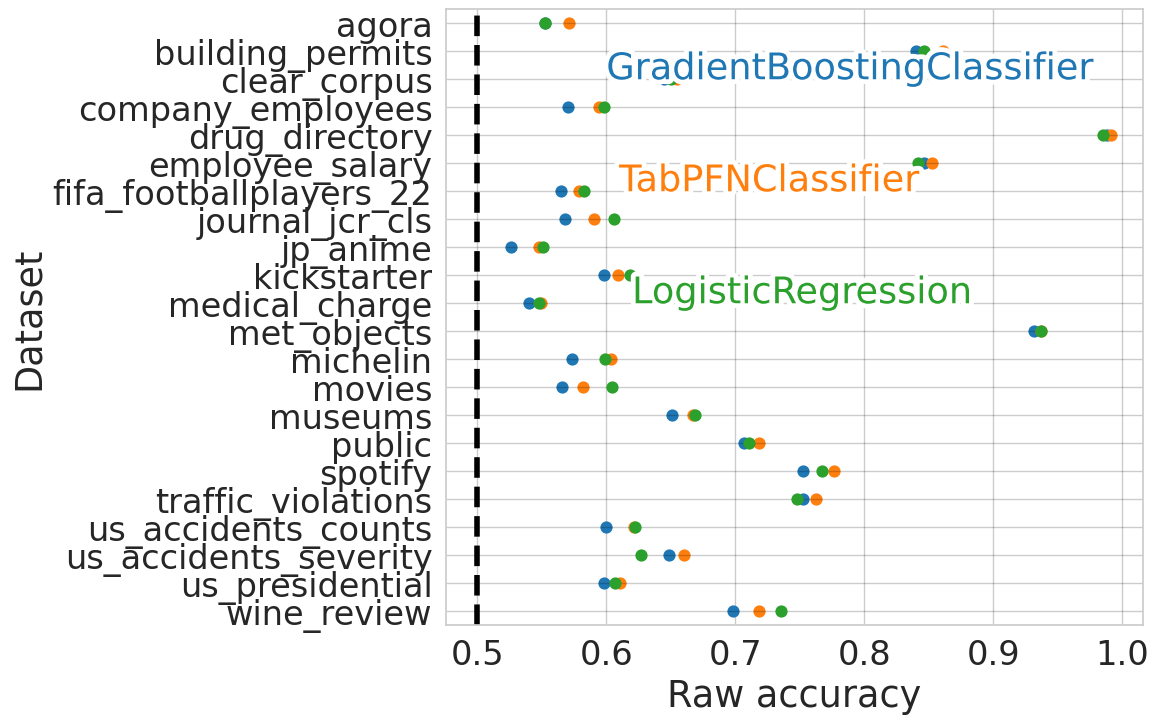

In [227]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# datasets = pd.read_csv("../results/results_all_04_10_5000.csv")["dataset"].unique()

# df = pd.concat([pd.read_csv("../results/results_all_04_10.csv"), 
#                 pd.read_csv("../results/results_all_04_10_5000.csv"),
#                 pd.read_csv("../results/results_all_04_10_other_n_train.csv")])

df = pd.read_csv("../results/results_all_04_10.csv")

df['features'] = df['features'].replace('all', 'Using Text + Tabular')
df['features'] = df['features'].replace('rest_only', 'Using Tabular')
df['features'] = df['features'].replace('text_only', 'Using Text')
df['encoding'] = df['encoding'].replace('openai__','OpenAI_ada-002')
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')

#df = df[df["dataset"].isin(datasets)]
# restict to model = GradientBoostingClassifier
#df = df[df["model"] == "GradientBoostingClassifier"] 
df["n_train"] = df["n_train"].astype(str)
df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]

# dim_reduction is passthrough if LogisticRegression else PCA_30
df = df[df["dim_reduction"] == df["model"].map({"LogisticRegression": "passthrough", "GradientBoostingClassifier": "PCA_30", "TabPFNClassifier": "PCA_30"})]

# features is all 
df = df[df["features"] == "Using Text"]
#df = df[df["features"] == "all"]

# normalize the accuracies
#df["accuracies"] = df.groupby(["dataset"])["accuracies"].transform(
##    lambda x: (x - x.min()) / (x.max() - x.min())
#)

# take the mean of the accuracies
features_to_group = ["dataset", "n_train", "features", "encoding", "dim_reduction", "model"]
# check that there are 5 accuracies per group
assert df.groupby(features_to_group)["accuracies"].count().min() == 5
assert df.groupby(features_to_group)["accuracies"].count().max() == 5
df = df.groupby(features_to_group)["accuracies"].mean().reset_index()

# second mean over all datasets
#df_averaged = df.groupby(["n_train", "features", "encoding"])["accuracies"].mean().reset_index()

# lineplot with seaborn
#sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features")
# make font 20
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


fig = plt.figure(figsize=(9, 8))
# paper style
sns.set(style="whitegrid", font_scale=2.2)

# Create the lineplot
# add points
#ax = sns.boxplot(data=df, x="accuracies", y="dataset", hue="model")
import matplotlib.patheffects as PathEffects



# Plot
ax = sns.pointplot(data=df, x="accuracies", y="dataset", hue="model", markers="o", linestyles="", ci=95, capsize=0.2, errwidth=2, palette="tab10")

# Prepare to annotate the points with adjustText
texts = []
for i, model in enumerate(df['model'].unique()):
    model_data = df[df['model'] == model]
    dataset = model_data['dataset'].values[0]
    dataset_data = model_data[model_data['dataset'] == dataset]
    if not dataset_data.empty:
        x_last = 0.6 + i * 0.01
        y_last = 4 * i + 2
        
        hue_order = list(df['model'].unique())
        color = sns.color_palette("tab10", len(hue_order))[hue_order.index(model)]
        
        text = ax.text(x_last, y_last, model, color=color)
        text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
        texts.append(text)

# Add horizontal lines for each dataset
for i, dataset in enumerate(df["dataset"].unique()):
    ax.axhline(y=i, color="black", linestyle="-", linewidth=1, alpha=0.2)

# Horizontal line for random guessing
ax.axvline(x=0.5, color="black", linestyle="--", linewidth=4)

#ax.legend(loc='best', ncol=1)
# remove legend
ax.legend_.remove()

ax.set_xlabel("Raw accuracy")
ax.set_ylabel("Dataset")

# save as pdf
plt.savefig("../figures/text_only.pdf", bbox_inches='tight')


In [135]:
df.head(20)

encoding dim_reduction  \
780  SentenceTransformer_all-mpnet-base-v2        PCA_30   
781  SentenceTransformer_all-mpnet-base-v2        PCA_30   
782  SentenceTransformer_all-mpnet-base-v2        PCA_30   
783  SentenceTransformer_all-mpnet-base-v2        PCA_30   
784  SentenceTransformer_all-mpnet-base-v2        PCA_30   
785  SentenceTransformer_all-mpnet-base-v2        PCA_30   
786  SentenceTransformer_all-mpnet-base-v2        PCA_30   
787  SentenceTransformer_all-mpnet-base-v2        PCA_30   
788  SentenceTransformer_all-mpnet-base-v2        PCA_30   
789  SentenceTransformer_all-mpnet-base-v2        PCA_30   
790  SentenceTransformer_all-mpnet-base-v2        PCA_30   
791  SentenceTransformer_all-mpnet-base-v2        PCA_30   
792  SentenceTransformer_all-mpnet-base-v2        PCA_30   
793  SentenceTransformer_all-mpnet-base-v2        PCA_30   
794  SentenceTransformer_all-mpnet-base-v2        PCA_30   
795  SentenceTransformer_all-mpnet-base-v2   passthrough   
796  SentenceTransformer_all-mpnet-base-v2   passthrough   
797  SentenceTransformer_all-mpnet-base-v2   passthrough   
798  SentenceTransformer_all-mpnet-base-v2   passthrough   
799  SentenceTransformer_all-mpnet-base-v2   passthrough   

                          model  accuracies   roc_auc n_train  n_test  \
780          LogisticRegression      0.5025  0.508873    1000    2000   
781          LogisticRegression      0.5245  0.539017    1000    2000   
782          LogisticRegression      0.5320  0.526512    1000    2000   
783          LogisticRegression      0.5265  0.522849    1000    2000   
784          LogisticRegression      0.5120  0.534339    1000    2000   
785  GradientBoostingClassifier      0.8340  0.903880    1000    2000   
786  GradientBoostingClassifier      0.8420  0.915709    1000    2000   
787  GradientBoostingClassifier      0.8340  0.902994    1000    2000   
788  GradientBoostingClassifier      0.8360  0.908674    1000    2000   
789  GradientBoostingClassifier      0.8500  0.912359    1000    2000   
790            TabPFNClassifier      0.8290  0.900614    1000    2000   
791            TabPFNClassifier      0.8255  0.902319    1000    2000   
792            TabPFNClassifier      0.8330  0.902892    1000    2000   
793            TabPFNClassifier      0.8315  0.900212    1000    2000   
794            TabPFNClassifier      0.8365  0.902382    1000    2000   
795          LogisticRegression      0.5025  0.508873    1000    2000   
796          LogisticRegression      0.5245  0.539017    1000    2000   
797          LogisticRegression      0.5320  0.526512    1000    2000   
798          LogisticRegression      0.5265  0.522849    1000    2000   
799          LogisticRegression      0.5120  0.534338    1000    2000   

     dataset              features  
780  spotify  Using Text + Tabular  
781  spotify  Using Text + Tabular  
782  spotify  Using Text + Tabular  
783  spotify  Using Text + Tabular  
784  spotify  Using Text + Tabular  
785  spotify  Using Text + Tabular  
786  spotify  Using Text + Tabular  
787  spotify  Using Text + Tabular  
788  spotify  Using Text + Tabular  
789  spotify  Using Text + Tabular  
790  spotify  Using Text + Tabular  
791  spotify  Using Text + Tabular  
792  spotify  Using Text + Tabular  
793  spotify  Using Text + Tabular  
794  spotify  Using Text + Tabular  
795  spotify  Using Text + Tabular  
796  spotify  Using Text + Tabular  
797  spotify  Using Text + Tabular  
798  spotify  Using Text + Tabular  
799  spotify  Using Text + Tabular

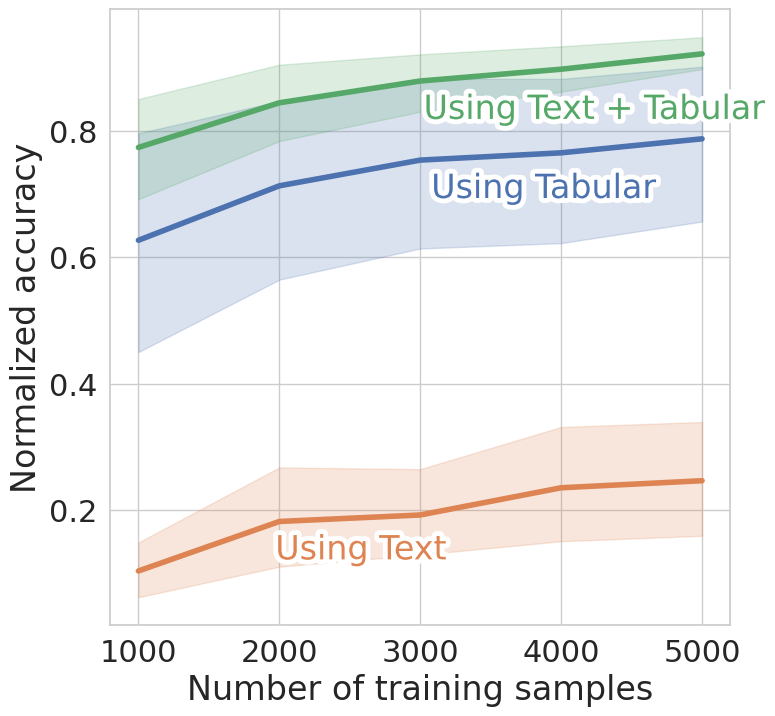

In [205]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

datasets = pd.read_csv("../results/results_all_04_10_5000.csv")["dataset"].unique()

df = pd.concat([pd.read_csv("../results/results_all_04_10.csv"), 
                pd.read_csv("../results/results_all_04_10_5000.csv"),
                pd.read_csv("../results/results_all_04_10_other_n_train.csv")])

df['features'] = df['features'].replace('all', 'Using Text + Tabular')
df['features'] = df['features'].replace('rest_only', 'Using Tabular')
df['features'] = df['features'].replace('text_only', 'Using Text')
df['encoding'] = df['encoding'].replace('openai__','OpenAI_ada-002')
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')

df = df[df["dataset"].isin(datasets)]
# restict to model = GradientBoostingClassifier
df = df[df["model"] == "GradientBoostingClassifier"] 
df["n_train"] = df["n_train"].astype(str)
df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]
#df = df[df["features"] == "all"]

# normalize the accuracies
df["accuracies"] = df.groupby(["dataset"])["accuracies"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# take the mean of the accuracies
features_to_group = ["dataset", "n_train", "features", "encoding"]
# check that there are 5 accuracies per group
assert df.groupby(features_to_group)["accuracies"].count().min() == 5
assert df.groupby(features_to_group)["accuracies"].count().max() == 5
df = df.groupby(features_to_group)["accuracies"].mean().reset_index()

# second mean over all datasets
#df_averaged = df.groupby(["n_train", "features", "encoding"])["accuracies"].mean().reset_index()

# lineplot with seaborn
#sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features")
# make font 20
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


fig = plt.figure(figsize=(8, 8))
# paper style
sns.set(style="whitegrid", font_scale=2)

# Create the lineplot
ax = sns.lineplot(data=df, x="n_train", y="accuracies", hue="features", style="encoding", linewidth=4)


# Prepare to annotate the lines with adjustText
texts = []
lines = ax.lines
for i, (model, line) in enumerate(zip(df['features'].unique(), lines)):
    index = -3 - (i % 2)
    x_last = line.get_xdata()[index] + np.random.uniform(-0.1, +0.1)
    y_last = line.get_ydata()[index] - 0.06
    
    text = ax.text(x_last, y_last, model, color=line.get_color())
    text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
    texts.append(text)


# remove legend
ax.legend().remove()

# x and y labels
ax.set_xlabel("Number of training samples")
ax.set_ylabel("Normalized accuracy")

# save as pdf
plt.savefig("../figures/fig_1_n_train.pdf", bbox_inches='tight')


In [9]:
df.head(20)

dataset n_train              features  \
0              agora    1000         Using Tabular   
1              agora    1000            Using Text   
2              agora    1000  Using Text + Tabular   
3              agora    2000         Using Tabular   
4              agora    2000            Using Text   
5              agora    2000  Using Text + Tabular   
6              agora    3000         Using Tabular   
7              agora    3000            Using Text   
8              agora    3000  Using Text + Tabular   
9              agora    4000         Using Tabular   
10             agora    4000            Using Text   
11             agora    4000  Using Text + Tabular   
12             agora    5000         Using Tabular   
13             agora    5000            Using Text   
14             agora    5000  Using Text + Tabular   
15  building_permits    1000         Using Tabular   
16  building_permits    1000            Using Text   
17  building_permits    1000  Using Text + Tabular   
18  building_permits    2000         Using Tabular   
19  building_permits    2000            Using Text   

                                 encoding  accuracies  
0   SentenceTransformer_all-mpnet-base-v2    0.333835  
1   SentenceTransformer_all-mpnet-base-v2    0.198496  
2   SentenceTransformer_all-mpnet-base-v2    0.338346  
3   SentenceTransformer_all-mpnet-base-v2    0.412030  
4   SentenceTransformer_all-mpnet-base-v2    0.341353  
5   SentenceTransformer_all-mpnet-base-v2    0.406015  
6   SentenceTransformer_all-mpnet-base-v2    0.503759  
7   SentenceTransformer_all-mpnet-base-v2    0.619549  
8   SentenceTransformer_all-mpnet-base-v2    0.484211  
9   SentenceTransformer_all-mpnet-base-v2    0.487218  
10  SentenceTransformer_all-mpnet-base-v2    0.736842  
11  SentenceTransformer_all-mpnet-base-v2    0.469173  
12  SentenceTransformer_all-mpnet-base-v2    0.524812  
13  SentenceTransformer_all-mpnet-base-v2    0.866165  
14  SentenceTransformer_all-mpnet-base-v2    0.521805  
15  SentenceTransformer_all-mpnet-base-v2    0.077073  
16  SentenceTransformer_all-mpnet-base-v2    0.723902  
17  SentenceTransformer_all-mpnet-base-v2    0.075122  
18  SentenceTransformer_all-mpnet-base-v2    0.149268  
19  SentenceTransformer_all-mpnet-base-v2    0.779512

In [22]:
pd.isnull(df).sum()

encoding         0
dim_reduction    0
model            0
accuracies       0
roc_auc          0
n_train          0
n_test           0
dataset          0
features         0
dtype: int64

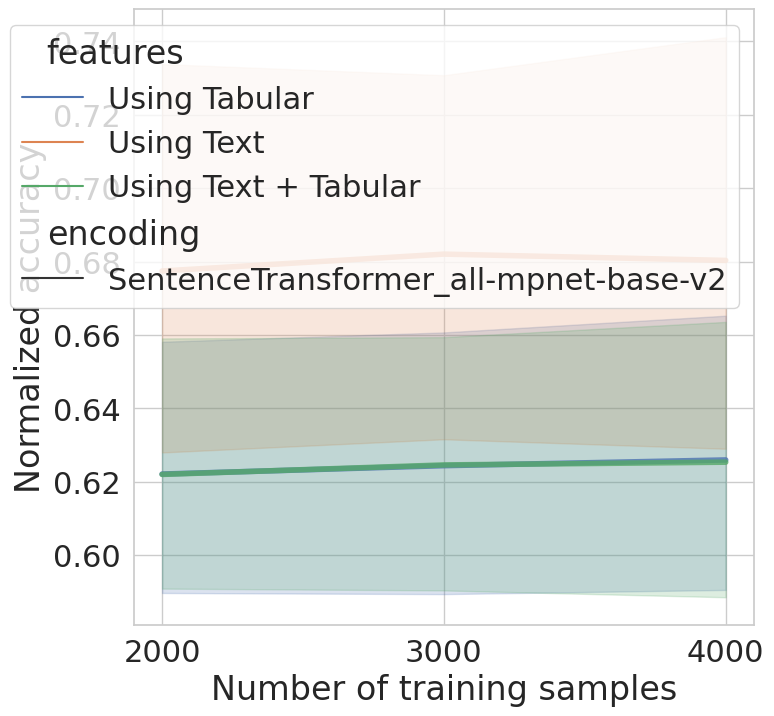

In [25]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# datasets = pd.read_csv("../results/results_all_04_10_5000.csv")["dataset"].unique()

# df = pd.concat([pd.read_csv("../results/results_all_04_10.csv"), 
#                 pd.read_csv("../results/results_all_04_10_5000.csv"),
#                 pd.read_csv("../results/results_all_04_10_other_n_train.csv")])
df = pd.read_csv("../results/results_all_05_10_log_reg.csv")

df['features'] = df['features'].replace('all', 'Using Text + Tabular')
df['features'] = df['features'].replace('rest_only', 'Using Tabular')
df['features'] = df['features'].replace('text_only', 'Using Text')
df['encoding'] = df['encoding'].replace('openai__','OpenAI_ada-002')
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')

df = df[df["dataset"].isin(datasets)]
# restict to model = GradientBoostingClassifier
df = df[df["model"] == "LogisticRegression"]
# restrict to dim_reduction = passthrough
df = df[df["dim_reduction"] == "passthrough"]
df["n_train"] = df["n_train"].astype(str)
#df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]
df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]
#df = df[df["features"] == "all"]

# normalize the accuracies
#df["accuracies"] = df.groupby(["dataset"])["accuracies"].transform(
#    lambda x: (x - x.min()) / (x.max() - x.min())
#)

# take the mean of the accuracies
features_to_group = ["dataset", "n_train", "features", "encoding"]
# check that there are 5 accuracies per group
assert df.groupby(features_to_group)["accuracies"].count().min() == 5
assert df.groupby(features_to_group)["accuracies"].count().max() == 5
df = df.groupby(features_to_group)["accuracies"].mean().reset_index()

# second mean over all datasets
#df_averaged = df.groupby(["n_train", "features", "encoding"])["accuracies"].mean().reset_index()

# lineplot with seaborn
#sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features")
# make font 20
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


fig = plt.figure(figsize=(8, 8))
# paper style
sns.set(style="whitegrid", font_scale=2)

# Create the lineplot
ax = sns.lineplot(data=df, x="n_train", y="accuracies", hue="features", style="encoding", linewidth=4, alpha=0.8)
#ax = sns.scatterplot(data=df, x="n_train", y="accuracies", hue="features", style="encoding", linewidth=4, alpha=0.8, s=100)


# Prepare to annotate the lines with adjustText
# texts = []
# lines = ax.lines
# for i, (model, line) in enumerate(zip(df['features'].unique(), lines)):
#     index = -3 - (i % 2)
#     x_last = line.get_xdata()[index] + np.random.uniform(-0.1, +0.1)
#     y_last = line.get_ydata()[index] - 0.06
    
#     text = ax.text(x_last, y_last, model, color=line.get_color())
#     text.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])
#     texts.append(text)


# remove legend
##ax.legend().remove()
#adjust_text(texts)
#


# x and y labels
ax.set_xlabel("Number of training samples")
ax.set_ylabel("Normalized accuracy")

# save as pdf
plt.savefig("../figures/fig_linear.pdf", bbox_inches='tight')


In [10]:
from src.data_loading import load_data
X_text, y = load_data("traffic_violations")

/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/skrub/datasets/_fetching.py:637: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(info["path"], **read_csv_kwargs)


Removed 4 columns with missing values on 41 columns
Removed 685671 rows with missing values on 1578154 rows
Removed 685671 rows with missing values on 1578154 rows
Removed 4 columns with missing values on 41 columns
New shape: (892483, 37)
Original task: classification for traffic_violations
Removing classes with less than 200 samples
Remaining classes: ['Citation' 'Warning']
Classes (array(['Citation', 'Warning'], dtype=object), array([385598, 506885]))
X_text shape: (892483,), X_rest shape: (892483, 37), y shape: (892483,)


In [12]:
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

6


/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


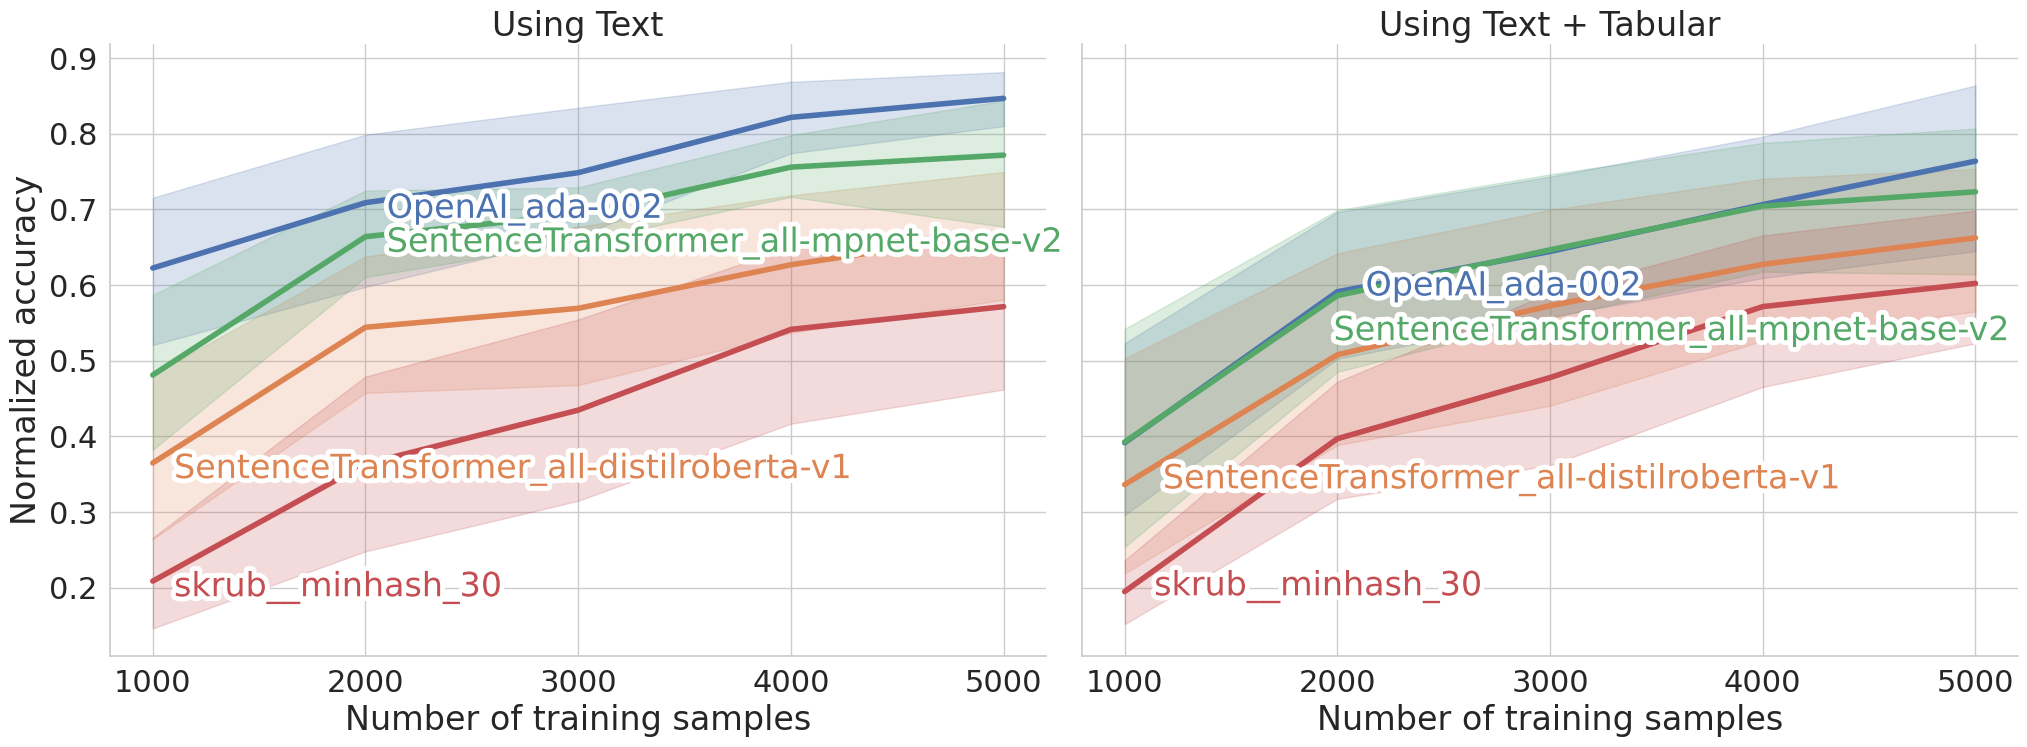

In [7]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

datasets = pd.read_csv("../results/results_all_04_10_5000.csv")["dataset"].unique()

df = pd.concat([pd.read_csv("../results/results_all_04_10.csv"), 
                pd.read_csv("../results/results_all_04_10_5000.csv"),
                pd.read_csv("../results/results_all_04_10_other_n_train.csv")])

df = df[df["features"].isin(["all", "text_only"])]


df['features'] = df['features'].replace('all', 'Using Text + Tabular')
df['features'] = df['features'].replace('rest_only', 'Using Tabular')
df['features'] = df['features'].replace('text_only', 'Using Text')
df['encoding'] = df['encoding'].replace('openai__','OpenAI_ada-002')
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')

df = df[df["dataset"].isin(datasets)]
datasets_with_gains = ["spotify", "employee_salary", "building_permits", "museums", "company_employees", "public", "clear_corpus", "us_accidents_counts"]
df = df[df["dataset"].isin(datasets_with_gains)]
print(len(df["dataset"].unique()))
# restict to model = GradientBoostingClassifier
df = df[df["model"] == "GradientBoostingClassifier"] 
df["n_train"] = df["n_train"].astype(str)
#df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]

# normalize the accuracies
df["accuracies"] = df.groupby(["dataset", "features"])["accuracies"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# take the mean of the accuracies
features_to_group = ["dataset", "n_train", "features", "encoding"]
# check that there are 5 accuracies per group
assert df.groupby(features_to_group)["accuracies"].count().min() == 5
assert df.groupby(features_to_group)["accuracies"].count().max() == 5
df = df.groupby(features_to_group)["accuracies"].mean().reset_index()

# second mean over all datasets
#df_averaged = df.groupby(["n_train", "features", "encoding"])["accuracies"].mean().reset_index()

# lineplot with seaborn
#sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features")
# make font 20
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects



# paper style
sns.set(style="whitegrid", font_scale=2)

# Create the lineplot
#ax = sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features", linewidth=4)
# Define a FacetGrid by 'features'
# Define a FacetGrid by 'features'
g = sns.FacetGrid(df, col="features", height=8, aspect=1.3)

# Create lineplot on the FacetGrid
g.map_dataframe(sns.lineplot, x="n_train", y="accuracies", hue="encoding", linewidth=4)
g.set_titles(col_template="{col_name}")

# Prepare to annotate the lines with adjustText
for ax, feature in zip(g.axes.flatten(), df['features'].unique()):
    lines = ax.lines
    texts = []
    for i, (model, line) in enumerate(zip(df['encoding'].unique(), lines)):
        index = -4 - (i % 2)
        x_last = line.get_xdata()[index] + 0.1
        y_last = line.get_ydata()[index] - 0.02

        text = ax.text(x_last, y_last, model, color=line.get_color())
        text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
        texts.append(text)

# Adjust the text labels
adjust_text(texts)

# Set labels and title
g.set_axis_labels("Number of training samples", "Normalized accuracy")

# remove legend
#ax.legend().remove()

# x and y labels
#ax.set_xlabel("Number of training samples")
#ax.set_ylabel("Normalized accuracy")

# save as pdf
#plt.savefig("../figures/fig_2_n_train.pdf")


In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# datasets = pd.read_csv("../results/results_all_04_10_5000.csv")["dataset"].unique()

# df = pd.concat([pd.read_csv("../results/results_all_04_10.csv"), 
#                 pd.read_csv("../results/results_all_04_10_5000.csv"),
#                 pd.read_csv("../results/results_all_04_10_other_n_train.csv")])


df = df[df["features"].isin(["all", "text_only"])]


df['features'] = df['features'].replace('all', 'Using Text + Tabular')
df['features'] = df['features'].replace('rest_only', 'Using Tabular')
df['features'] = df['features'].replace('text_only', 'Using Text')
df['encoding'] = df['encoding'].replace('openai__','OpenAI_ada-002')
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')

df = df[df["dataset"].isin(datasets)]
datasets_with_gains = ["spotify", "employee_salary", "building_permits", "museums", "company_employees", "public", "clear_corpus", "us_accidents_counts"]
df = df[df["dataset"].isin(datasets_with_gains)]
print(len(df["dataset"].unique()))
# restict to model = GradientBoostingClassifier
df = df[df["model"] == "GradientBoostingClassifier"] 
df["n_train"] = df["n_train"].astype(str)
#df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]

# normalize the accuracies
df["accuracies"] = df.groupby(["dataset", "features"])["accuracies"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# take the mean of the accuracies
features_to_group = ["dataset", "n_train", "features", "encoding"]
# check that there are 5 accuracies per group
assert df.groupby(features_to_group)["accuracies"].count().min() == 5
assert df.groupby(features_to_group)["accuracies"].count().max() == 5
df = df.groupby(features_to_group)["accuracies"].mean().reset_index()

# second mean over all datasets
#df_averaged = df.groupby(["n_train", "features", "encoding"])["accuracies"].mean().reset_index()

# lineplot with seaborn
#sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features")
# make font 20
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects



# paper style
sns.set(style="whitegrid", font_scale=2)

# Create the lineplot
#ax = sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features", linewidth=4)
# Define a FacetGrid by 'features'
# Define a FacetGrid by 'features'
g = sns.FacetGrid(df, col="features", height=8, aspect=1.3)

# Create lineplot on the FacetGrid
g.map_dataframe(sns.lineplot, x="n_train", y="accuracies", hue="encoding", linewidth=4)
g.set_titles(col_template="{col_name}")

# Prepare to annotate the lines with adjustText
for ax, feature in zip(g.axes.flatten(), df['features'].unique()):
    lines = ax.lines
    texts = []
    for i, (model, line) in enumerate(zip(df['encoding'].unique(), lines)):
        index = -4 - (i % 2)
        x_last = line.get_xdata()[index] + 0.1
        y_last = line.get_ydata()[index] - 0.02

        text = ax.text(x_last, y_last, model, color=line.get_color())
        text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
        texts.append(text)

# Adjust the text labels
adjust_text(texts)

# Set labels and title
g.set_axis_labels("Number of training samples", "Normalized accuracy")

# remove legend
#ax.legend().remove()

# x and y labels
#ax.set_xlabel("Number of training samples")
#ax.set_ylabel("Normalized accuracy")

# save as pdf
#plt.savefig("../figures/fig_2_n_train.pdf")


In [8]:
pd.read_csv("../results/results_catboost_text_only.csv")

encoding dim_reduction     model  accuracies   roc_auc  n_train  n_test  \
0    catboost          none  catboost      0.6110  0.604137     1000    2000   
1    catboost          none  catboost      0.6130  0.628730     1000    2000   
2    catboost          none  catboost      0.5830  0.607605     1000    2000   
3    catboost          none  catboost      0.6030  0.608454     1000    2000   
4    catboost          none  catboost      0.5965  0.590919     1000    2000   
..        ...           ...       ...         ...       ...      ...     ...   
275  catboost          none  catboost      0.7620  0.813720     4000    2000   
276  catboost          none  catboost      0.7475  0.801664     4000    2000   
277  catboost          none  catboost      0.7745  0.820671     4000    2000   
278  catboost          none  catboost      0.7485  0.802352     4000    2000   
279  catboost          none  catboost      0.7620  0.828520     4000    2000   

                dataset   features  
0       journal_jcr_cls  text_only  
1       journal_jcr_cls  text_only  
2       journal_jcr_cls  text_only  
3       journal_jcr_cls  text_only  
4       journal_jcr_cls  text_only  
..                  ...        ...  
275  traffic_violations  text_only  
276  traffic_violations  text_only  
277  traffic_violations  text_only  
278  traffic_violations  text_only  
279  traffic_violations  text_only  

[280 rows x 9 columns]

In [10]:
df

encoding dim_reduction               model  accuracies  \
675  skrub__minhash_30   passthrough  LogisticRegression    0.000000   
676  skrub__minhash_30   passthrough  LogisticRegression    0.059701   
677  skrub__minhash_30   passthrough  LogisticRegression    0.032147   
678  skrub__minhash_30   passthrough  LogisticRegression    0.081515   
679  skrub__minhash_30   passthrough  LogisticRegression    0.083812   
..                 ...           ...                 ...         ...   
275           catboost          none            catboost    0.889831   
276           catboost          none            catboost    0.766949   
277           catboost          none            catboost    0.995763   
278           catboost          none            catboost    0.775424   
279           catboost          none            catboost    0.889831   

      roc_auc n_train  n_test             dataset              features  
675  0.541708    1000    2000             spotify  Using Text + Tabular  
676  0.562642    1000    2000             spotify  Using Text + Tabular  
677  0.545287    1000    2000             spotify  Using Text + Tabular  
678  0.563796    1000    2000             spotify  Using Text + Tabular  
679  0.557055    1000    2000             spotify  Using Text + Tabular  
..        ...     ...     ...                 ...                   ...  
275  0.813720    4000    2000  traffic_violations            Using Text  
276  0.801664    4000    2000  traffic_violations            Using Text  
277  0.820671    4000    2000  traffic_violations            Using Text  
278  0.802352    4000    2000  traffic_violations            Using Text  
279  0.828520    4000    2000  traffic_violations            Using Text  

[1900 rows x 9 columns]

In [24]:
df

encoding dim_reduction                       model  accuracies  \
500  skrub__minhash_30   passthrough  GradientBoostingClassifier      0.8065   
501  skrub__minhash_30   passthrough  GradientBoostingClassifier      0.8175   
502  skrub__minhash_30   passthrough  GradientBoostingClassifier      0.7985   
503  skrub__minhash_30   passthrough  GradientBoostingClassifier      0.8085   
504  skrub__minhash_30   passthrough  GradientBoostingClassifier      0.8065   
..                 ...           ...                         ...         ...   
135           catboost          none                    catboost      0.5270   
136           catboost          none                    catboost      0.5480   
137           catboost          none                    catboost      0.5180   
138           catboost          none                    catboost      0.5505   
139           catboost          none                    catboost      0.5580   

      roc_auc n_train  n_test         dataset              features  
500  0.883972    2000    2000         spotify  Using Text + Tabular  
501  0.894181    2000    2000         spotify  Using Text + Tabular  
502  0.884921    2000    2000         spotify  Using Text + Tabular  
503  0.886335    2000    2000         spotify  Using Text + Tabular  
504  0.886887    2000    2000         spotify  Using Text + Tabular  
..        ...     ...     ...             ...                   ...  
135  0.558887    2000    2000  medical_charge            Using Text  
136  0.554825    2000    2000  medical_charge            Using Text  
137  0.524018    2000    2000  medical_charge            Using Text  
138  0.576783    2000    2000  medical_charge            Using Text  
139  0.570682    2000    2000  medical_charge            Using Text  

[160 rows x 9 columns]

In [36]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


datasets_1 = pd.read_csv("../results/results_all_04_10_5000.csv")["dataset"].unique()
datasets_2 = pd.read_csv("../results/results_catboost.csv")["dataset"].unique()

df = pd.concat([pd.read_csv("../results/results_all_04_10.csv"), 
                pd.read_csv("../results/results_all_04_10_5000.csv"),
                pd.read_csv("../results/results_all_04_10_other_n_train.csv"),
                pd.read_csv("../results/results_catboost.csv"),
                pd.read_csv("../results/results_catboost_text_only.csv"),
                pd.read_csv("../results/results_catboost_5000.csv")])

df = df[df["features"].isin(["all", "text_only"])]


df['features'] = df['features'].replace('all', 'Using Text + Tabular')
df['features'] = df['features'].replace('rest_only', 'Using Tabular')
df['features'] = df['features'].replace('text_only', 'Using Text')
df['encoding'] = df['encoding'].replace('openai__','OpenAI_ada-002')
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')

df = df[df["dataset"].isin(datasets_1)]
df = df[df["dataset"].isin(datasets_2)]

#datasets_with_gains = ["spotify", "employee_salary", "building_permits", "museums", "company_employees", "public", "clear_corpus", "us_accidents_counts"]
#df = df[df["dataset"].isin(datasets_with_gains)]
print(len(df["dataset"].unique()))
# restict to model = GradientBoostingClassifier
#df = df[df["model"] == "GradientBoostingClassifier"] 
df["n_train"] = df["n_train"].astype(str)
#df = df[df["encoding"].isin(["catboost", "skrub__minhash_30"])]
df = df[df["model"].isin(["catboost", "GradientBoostingClassifier"])]
#df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]
# n_train 2000
df = df[df["n_train"] == "4000"]


# normalize the accuracies
# df["accuracies"] = df.groupby(["dataset", "features"])["accuracies"].transform(
#     lambda x: (x - x.min()) / (x.max() - x.min())
# )

# # take the mean of the accuracies
# features_to_group = ["dataset", "n_train", "features", "encoding"]
# # check that there are 5 accuracies per group
# assert df.groupby(features_to_group)["accuracies"].count().min() == 5
# assert df.groupby(features_to_group)["accuracies"].count().max() == 5
# df = df.groupby(features_to_group)["accuracies"].mean().reset_index()

# second mean over all datasets
#df_averaged = df.groupby(["n_train", "features", "encoding"])["accuracies"].mean().reset_index()

# lineplot with seaborn
#sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features")
# make font 20
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects



# paper style
# sns.set(style="whitegrid", font_scale=2)

# # Create the lineplot
# #ax = sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features", linewidth=4)
# # Define a FacetGrid by 'features'
# # Define a FacetGrid by 'features'
# g = sns.FacetGrid(df, col="features", height=8, aspect=1.3)

# # Create lineplot on the FacetGrid
# g.map_dataframe(sns.stripplot, x="accuracies", y="dataset", hue="encoding", linewidth=4)
# g.set_titles(col_template="{col_name}")

fig = px.strip(df, x="accuracies", y="dataset", color="encoding", facet_col="features", hover_data=df.columns)
# Add horizontal line shapes for each subplot
# Show the plot
fig.show()

# Prepare to annotate the lines with adjustText
# for ax, feature in zip(g.axes.flatten(), df['features'].unique()):
#     lines = ax.lines
#     texts = []
#     for i, (model, line) in enumerate(zip(df['encoding'].unique(), lines)):
#         index = -4 - (i % 2)
#         x_last = line.get_xdata()[index] + 0.1
#         y_last = line.get_ydata()[index] - 0.02

#         text = ax.text(x_last, y_last, model, color=line.get_color())
#         text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
#         texts.append(text)

# # Adjust the text labels
# adjust_text(texts)

# # Set labels and title
# g.set_axis_labels("Number of training samples", "Normalized accuracy")

# remove legend
#ax.legend().remove()

# x and y labels
#ax.set_xlabel("Number of training samples")
#ax.set_ylabel("Normalized accuracy")

# save as pdf
#plt.savefig("../figures/fig_2_n_train.pdf")


9


9


/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



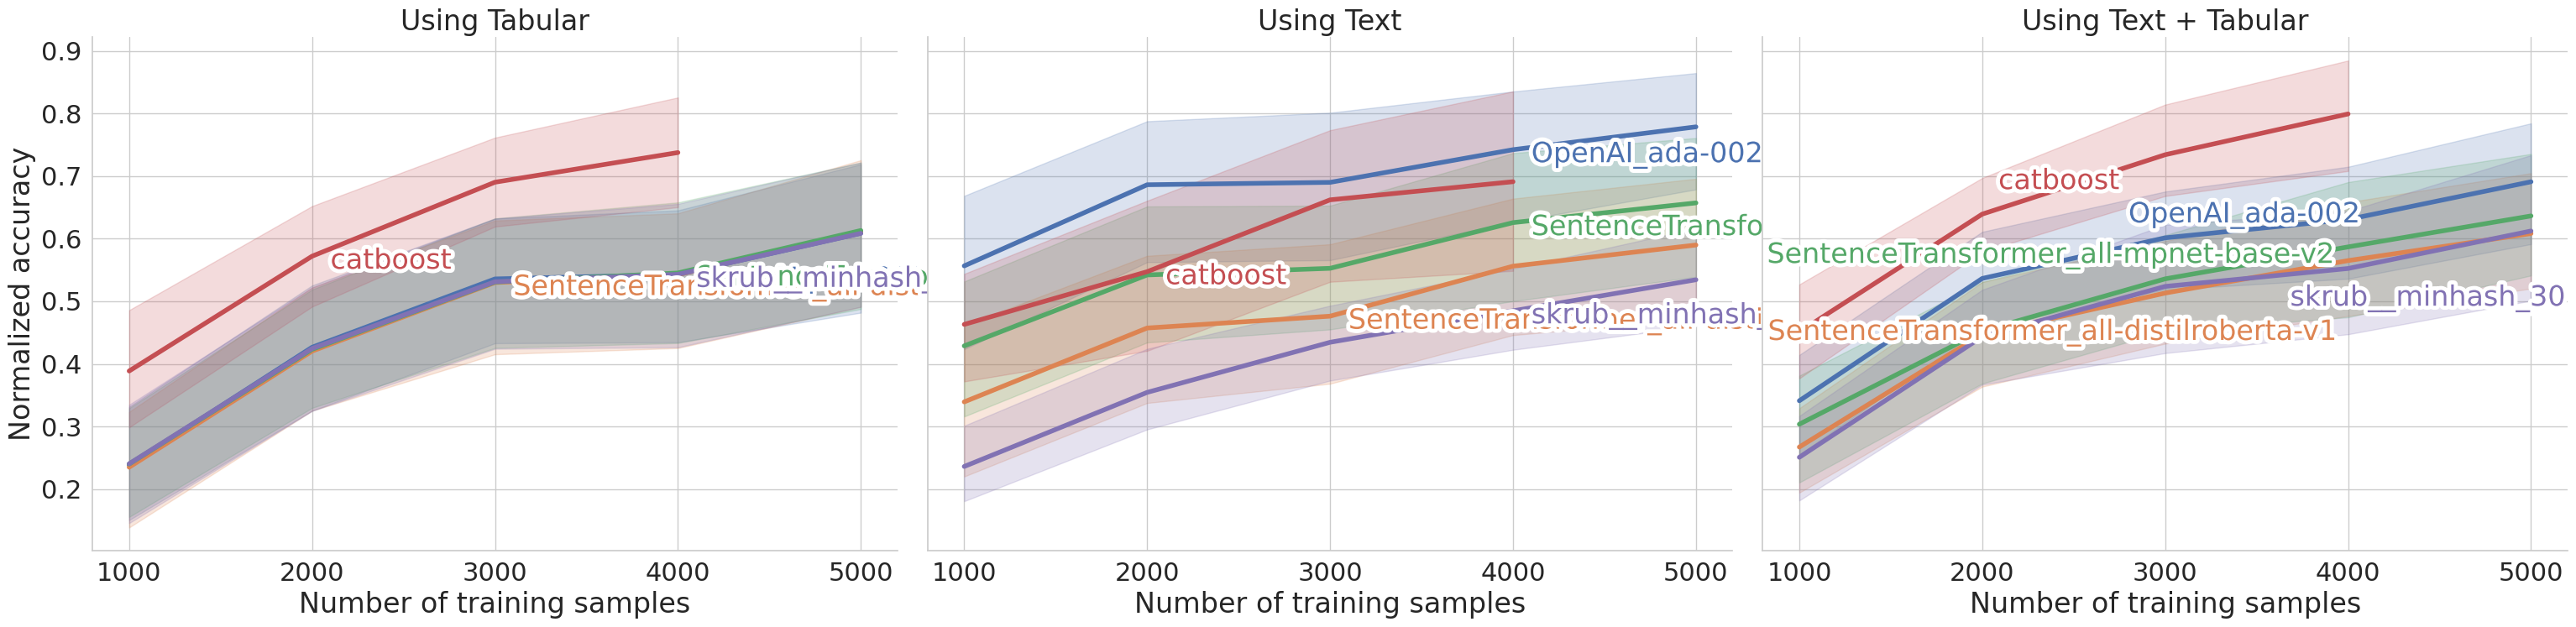

In [31]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

datasets_1 = pd.read_csv("../results/results_all_04_10_5000.csv")["dataset"].unique()
datasets_2 = pd.read_csv("../results/results_catboost.csv")["dataset"].unique()

df = pd.concat([pd.read_csv("../results/results_all_04_10.csv"), 
                pd.read_csv("../results/results_all_04_10_5000.csv"),
                pd.read_csv("../results/results_all_04_10_other_n_train.csv"),
                pd.read_csv("../results/results_catboost.csv"),
                pd.read_csv("../results/results_catboost_text_only.csv")])
                #pd.read_csv("../results/results_catboost_5000.csv")])

#df = df[df["features"].isin(["all", "text_only"])]


df['features'] = df['features'].replace('all', 'Using Text + Tabular')
df['features'] = df['features'].replace('rest_only', 'Using Tabular')
df['features'] = df['features'].replace('text_only', 'Using Text')
df['encoding'] = df['encoding'].replace('openai__','OpenAI_ada-002')
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')

df = df[df["dataset"].isin(datasets_1)]
df = df[df["dataset"].isin(datasets_2)]

#datasets_with_gains = ["spotify", "employee_salary", "building_permits", "museums", "company_employees", "public", "clear_corpus", "us_accidents_counts"]
#df = df[df["dataset"].isin(datasets_with_gains)]
print(len(df["dataset"].unique()))
# restict to model = GradientBoostingClassifier
#df = df[df["model"] == "GradientBoostingClassifier"] 
df["n_train"] = df["n_train"].astype(str)
#df = df[df["encoding"].isin(["catboost", "skrub__minhash_30"])]
df = df[df["model"].isin(["catboost", "GradientBoostingClassifier"])]
#df = df[df["encoding"] == "SentenceTransformer_all-mpnet-base-v2"]

# normalize the accuracies
df["accuracies"] = df.groupby(["dataset", "features"])["accuracies"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# take the mean of the accuracies
features_to_group = ["dataset", "n_train", "features", "encoding"]
# check that there are 5 accuracies per group
assert df.groupby(features_to_group)["accuracies"].count().min() == 5
assert df.groupby(features_to_group)["accuracies"].count().max() == 5
df = df.groupby(features_to_group)["accuracies"].mean().reset_index()

# second mean over all datasets
#df_averaged = df.groupby(["n_train", "features", "encoding"])["accuracies"].mean().reset_index()

# lineplot with seaborn
#sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features")
# make font 20
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects



# paper style
sns.set(style="whitegrid", font_scale=2)

# Create the lineplot
#ax = sns.lineplot(data=df, x="n_train", y="accuracies", hue="encoding", style="features", linewidth=4)
# Define a FacetGrid by 'features'
# Define a FacetGrid by 'features'
g = sns.FacetGrid(df, col="features", height=8, aspect=1.3)

# Create lineplot on the FacetGrid
g.map_dataframe(sns.lineplot, x="n_train", y="accuracies", hue="encoding", linewidth=4)
g.set_titles(col_template="{col_name}")

# Prepare to annotate the lines with adjustText
for ax, feature in zip(g.axes.flatten(), df['features'].unique()):
    lines = ax.lines
    texts = []
    for i, (model, line) in enumerate(zip(df['encoding'].unique(), lines)):
        index = -2 - (i % 2)
        x_last = line.get_xdata()[index] + 0.1
        y_last = line.get_ydata()[index] - 0.02

        text = ax.text(x_last, y_last, model, color=line.get_color())
        text.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='white')])
        texts.append(text)

# Adjust the text labels
adjust_text(texts)

# Set labels and title
g.set_axis_labels("Number of training samples", "Normalized accuracy")

# remove legend
#ax.legend().remove()

# x and y labels
#ax.set_xlabel("Number of training samples")
#ax.set_ylabel("Normalized accuracy")

# save as pdf
#plt.savefig("../figures/fig_2_n_train.pdf")


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# previous_results = pd.read_csv("../results/results_all_01_10.csv")
# new_results = pd.read_csv("../results/results_all_openai.csv")
# skrub_results = pd.read_csv("../results/results_all_skrub.csv")
# melted_results = pd.concat([previous_results, new_results, skrub_results])
melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results = pd.read_csv("../results/results_all_04_10_5000.csv")
melted_results["accuracy"] = melted_results["accuracies"]


datasets_with_gains = ["spotify", "employee_salary", "building_permits", "museums", "company_employees", "public", "clear_corpus", "us_accidents_counts"]
for dataset in datasets_with_gains:
    assert dataset in melted_results["dataset"].unique(), f"{dataset} not in melted_results"

melted_results = melted_results[melted_results["dataset"].isin(datasets_with_gains)]

#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")

melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
#melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']
melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']

# rename Encodings
# replace "openai__" with "OpenAI_ada-002"
melted_results['encoding'] = melted_results['encoding'].replace('openai__','OpenAI_ada-002')
# replace "lm__" by "SentenceTransformer_" as prefix
melted_results['encoding'] = melted_results['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_distilroberta')
melted_results['encoding'] = melted_results['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_mpnet')
# filter for one of these
melted_results = melted_results[melted_results['encoding'].isin(['OpenAI_ada-002', 'SentenceTransformer_distilroberta', 'SentenceTransformer_mpnet', 'skrub__minhash_30'])]
#melted_results = melted_results[melted_results['encoding'] == "SentenceTransformer_all-mpnet-base-v2"]



melted_results['normalized_accuracy'] = melted_results.groupby(["dataset", "features"])['accuracy'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
#melted_results['normalized_accuracy'] = melted_results["accuracy"]

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
melted_results = melted_results.groupby(group_cols)['normalized_accuracy'].mean().reset_index()

#rename categories in features
melted_results['features'] = melted_results['features'].replace('all', 'Text + Tabular')
melted_results['features'] = melted_results['features'].replace('rest_only', 'Tabular')
melted_results['features'] = melted_results['features'].replace('text_only', 'Text')

melted_results = melted_results[melted_results['features'].isin(['Text + Tabular', 'Text'])]


sns.set(style="whitegrid", font_scale=2)

# Create the plot
sns.lineplot(
    data=melted_results,
    x="dataset",
    y="normalized_accuracy",
    hue="encoding",  # color in Plotly is hue in Seaborn
    style="features",  # facet_row in Plotly is col in Seaborn
    #kind="box",
    #height=10,  # adjust as needed
    #aspect=0.8,  # adjust as needed (aspect * height gives width of each facet)
)

# # Create the plot
# fig = px.box(
#     data_frame=melted_results,
#     x="normalized_accuracy",
#     y="encoding",
#     #color="dim_reduction",
#     facet_col = "features",
#     hover_data=melted_results.columns,
#     #category_orders={"model": ['TabPFNClassifier', 'GradientBoostingClassifier', 'LogisticRegression']},
#     category_orders={"encoding": ['OpenAI_ada-002', 'SentenceTransformer_mpnet', 'SentenceTransformer_distilroberta', "skrub__minhash_30"]},
#     title="",
#     labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model", "normalized_accuracy": "Normalized Accuracy", "encoding": ""},
# )

# # format for a paper
# height=600
# width=1200
# # change the size of the plot
# fig.update_layout(
#     height=height,
#     width=width,
#     #),
# )
# # make text bigger
# fig.update_layout(
#     font=dict(
#         size=20,
#     )
# )

# # Show the figure
# fig.show()

# # #save fig as pdf
# fig.write_image("../figures/fig_2.pdf")

FileNotFoundError: [Errno 2] No such file or directory: '../results/results_all_04_10.csv'

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# previous_results = pd.read_csv("../results/results_all_01_10.csv")
# new_results = pd.read_csv("../results/results_all_openai.csv")
# skrub_results = pd.read_csv("../results/results_all_skrub.csv")
# melted_results = pd.concat([previous_results, new_results, skrub_results])
melted_results = pd.read_csv("../results/results_all_04_10.csv")
melted_results["accuracy"] = melted_results["roc_auc"]

#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")


melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
melted_results = melted_results[melted_results['model'] != 'TabPFNClassifier_basic']


# rename Encodings
# replace "openai__" with "OpenAI_ada-002"
melted_results['encoding'] = melted_results['encoding'].replace('openai__','OpenAI_ada-002')
# replace "lm__" by "SentenceTransformer_" as prefix
melted_results['encoding'] = melted_results['encoding'].replace('lm__all-distilroberta-v1', 'SentenceTransformer_all-distilroberta-v1')
melted_results['encoding'] = melted_results['encoding'].replace('lm__all-mpnet-base-v2', 'SentenceTransformer_all-mpnet-base-v2')
# filter for one of these
melted_results = melted_results[melted_results['encoding'].isin(['OpenAI_ada-002', 'SentenceTransformer_all-distilroberta-v1', 'SentenceTransformer_all-mpnet-base-v2', "skrub__minhash_30"])]



melted_results['normalized_accuracy'] = melted_results.groupby(["dataset"])['accuracy'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

group_cols = ['dataset', 'model', 'dim_reduction', 'encoding', "features"]
melted_results = melted_results.groupby(group_cols)['normalized_accuracy'].mean().reset_index()




# # Create the plot
fig = px.box(
    data_frame=melted_results,
    x="normalized_accuracy",
    y="encoding",
    color="features",
    #color="dim_reduction",
    facet_row = "model",
    category_orders={"model": ['TabPFNClassifier', 'GradientBoostingClassifier', 'LogisticRegression']},
    title="Normalized accuracy across datasets",
    hover_data=melted_results.columns,
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
    height=1000,
    width=900,
)

# Show the figure
fig.show()

# #save fig as pdf
fig.write_image("../figures/fig_all.pdf")

# g = sns.catplot(
#     data=melted_results,
#     y="normalized_accuracy",
#     x="encoding",
#     hue="features",  # color in Plotly is hue in Seaborn
#     col="model",  # facet_row in Plotly is col in Seaborn
#     kind="box",
#     height=10,  # adjust as needed
#     aspect=0.8,  # adjust as needed (aspect * height gives width of each facet)
# )

# g.fig.subplots_adjust(top=0.9)  # adjust as needed
# g.fig.suptitle("Normalized accuracy across datasets")

# plt.show()

caption = """

"""

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# previous_results = pd.read_csv("../results/results_all_01_10.csv")
# new_results = pd.read_csv("../results/results_all_openai.csv")
# #results_skrub = pd.read_csv("../results/results_all_skrub.csv")
# melted_results = pd.concat([previous_results, new_results])#, results_skrub])
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")
melted_results = pd.read_csv("../results/results_all_04_10.csv")
melted_results["accuracy"] = melted_results["accuracies"]


#melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results["accuracy"] = melted_results["roc_auc"]
melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']
rest_only_accuracy = melted_results[melted_results['features'] == 'rest_only']
rest_only_accuracy = rest_only_accuracy[rest_only_accuracy['encoding'] == 'lm__all-mpnet-base-v2'] # the encoding shouldn't matter #TODO: check

skrub_accuracy = melted_results[melted_results['features'] == 'all']
skrub_accuracy = skrub_accuracy[skrub_accuracy['encoding'] == 'skrub__minhash_30']

lm_accuracy = melted_results[melted_results['features'] == 'all']
#lm_accuracy = lm_accuracy[lm_accuracy['encoding'] == 'lm__all-mpnet-base-v2']
#lm_accuracy = lm_accuracy[lm_accuracy['encoding'] == 'openai__']
# roberta
lm_accuracy = lm_accuracy[lm_accuracy['encoding'] == 'openai__']

assert (skrub_accuracy['dataset'].values == lm_accuracy['dataset'].values).all()
assert (skrub_accuracy['dataset'].values == rest_only_accuracy['dataset'].values).all()
skrub_accuracy['accuracy'] = skrub_accuracy['accuracy'] - rest_only_accuracy['accuracy'].values
lm_accuracy['accuracy'] = lm_accuracy['accuracy'] - rest_only_accuracy['accuracy'].values

# create new df
skrub_accuracy['Text encoding'] = 'MinHashEncoder (skrub)'
lm_accuracy['Text encoding'] = 'Language model (OpenAI-ada-002)'
new_df = pd.concat([skrub_accuracy, lm_accuracy])

# order by lm accuracy
new_df = new_df.sort_values(by=['accuracy'], ascending=True)

# plot
fig = px.box(
    data_frame=new_df,
    x="accuracy",
    y="dataset",
    color="Text encoding",
    #category_orders={"model": ['GradientBoostingClassifier']},
    title="",
    hover_data=new_df.columns,
    labels={"accuracy": "Accuracy gain compared to using only tabular features", "dataset": "", "model": "Model"},
    height=1000,
    width=1200,
)
# increase font
# make text bigger
fig.update_layout(
    font=dict(
        size=20,
    )
)


# vline in 0
fig.add_vline(x=0, line_width=3, line_dash="dash", line_color="black")

# Show the figure
fig.show()
fig.write_image("../figures/fig_3.pdf")

# save the figure


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# previous_results = pd.read_csv("../results/results_all_01_10.csv")
# new_results = pd.read_csv("../results/results_all_openai.csv")
# #results_skrub = pd.read_csv("../results/results_all_skrub.csv")
# melted_results = pd.concat([previous_results, new_results])#, results_skrub])
#melted_results = pd.read_csv("../results/results_all_n_train_5000.csv")
melted_results = pd.read_csv("../results/results_all_04_10.csv")
melted_results["accuracy"] = melted_results["accuracies"]


#melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results["accuracy"] = melted_results["roc_auc"]
melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
# model = GradientBoostingClassifier
melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']
# features = all
melted_results = melted_results[melted_results['features'] == 'all']

# order by lm accuracy
melted_results = melted_results.sort_values(by=['accuracy'], ascending=True)

# plot
fig = px.box(
    data_frame=melted_results,
    x="accuracy",
    y="dataset",
    color="encoding",
    #category_orders={"model": ['GradientBoostingClassifier']},
    title="",
    hover_data=melted_results.columns,
    labels={"accuracy": "Accuracy", "dataset": "", "model": "Model"},
    height=1000,
    width=1200,
)
# increase font
# make text bigger
fig.update_layout(
    font=dict(
        size=20,
    )
)


# vline in 0
#fig.add_vline(x=0, line_width=3, line_dash="dash", line_color="black")

# Show the figure
fig.show()
#fig.write_image("../figures/fig_3.pdf")

# save the figure


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

previous_results = pd.read_csv("../results/results_all_01_10.csv")
new_results = pd.read_csv("../results/results_all_openai.csv")
#results_skrub = pd.read_csv("../results/results_all_skrub.csv")
melted_results = pd.concat([previous_results, new_results])#, results_skrub])

# filter for encoding in lm__all-MiniLM-L12-v2, lm__all-mpnet-base-v2, lm__all-distilroberta-v1
#melted_results = melted_results[melted_results['encoding'].isin(['lm__all-distilroberta-v1', 'bert_custom_pooling__distilroberta-base', 'bert_custom__distilroberta-base', "bert_custom_pooling__sentence-transformers/all-distilroberta-v1"])]
melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
# remove "wine_review"
melted_results = melted_results[melted_results['dataset'] != 'wine_review']
melted_results = melted_results[melted_results['model'] != 'TabPFNClassifier_basic']
# only GradientBoostingClassifier
melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']
text_only_accuracy = melted_results[melted_results['features'] == 'text_only']
text_only_accuracy = text_only_accuracy[text_only_accuracy['encoding'] == 'lm__all-mpnet-base-v2']

skrub_accuracy = melted_results[melted_results['features'] == 'all']
skrub_accuracy = skrub_accuracy[skrub_accuracy['encoding'] == 'skrub__minhash_30']

lm_accuracy = melted_results[melted_results['features'] == 'all']
lm_accuracy = lm_accuracy[lm_accuracy['encoding'] == 'lm__all-mpnet-base-v2']

assert (skrub_accuracy['dataset'].values == lm_accuracy['dataset'].values).all()
assert (skrub_accuracy['dataset'].values == text_only_accuracy['dataset'].values).all()
skrub_accuracy['accuracy'] = skrub_accuracy['accuracy'] - text_only_accuracy['accuracy'].values
lm_accuracy['accuracy'] = lm_accuracy['accuracy'] - text_only_accuracy['accuracy'].values

# create new df
skrub_accuracy['Text encoding'] = 'MinHashEncoder (skrub)'
lm_accuracy['Text encoding'] = 'Language model (all-mpnet-base-v2)'
new_df = pd.concat([skrub_accuracy, lm_accuracy])

# order by lm accuracy
new_df = new_df.sort_values(by=['accuracy'], ascending=True)

# plot
fig = px.box(
    data_frame=new_df,
    x="accuracy",
    y="dataset",
    color="Text encoding",
    facet_row = "model",
    #category_orders={"model": ['GradientBoostingClassifier']},
    title="Gains from rest features",
    hover_data=new_df.columns,
    labels={"accuracy": "Accuracy gain compared to using only the text feature", "dataset": "Dataset", "model": "Model"},
    height=1000,
    width=900,
)

# vline in 0
fig.add_vline(x=0, line_width=3, line_dash="dash", line_color="black")

# Show the figure
fig.show()

In [68]:
skrub_accuracy['dataset'].values == rest_only_accuracy['dataset'].values

/tmp/ipykernel_2789403/2270059064.py:1: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



False

In [65]:
skrub_accuracy['dataset'].values == lm_accuracy['dataset'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [4]:
# Assuming these are your models
previous_results = pd.read_csv("../results/results_all_01_10.csv")
new_results = pd.read_csv("../results/results_all_openai.csv")
melted_results = pd.concat([previous_results, new_results])

#melted_results = melted_results.groupby(['dataset', 'model', 'dim_reduction', 'encoding', "features"]).mean().reset_index()
melted_results = melted_results[melted_results['dim_reduction'] == 'PCA_30']
models = melted_results['model'].unique()

# # Example colors, you can modify this list based on your preferences or number of models
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# # Create a dictionary mapping model names to colors
# model_color_palette = dict(zip(models, colors))



In [ ]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


# fig size
plt.figure(figsize=(10, 10))

# paper style
sns.set(style="whitegrid", font_scale=2)

# Create the lineplot
ax = sns.boxplot(
    x="num_train",
    y="r2",
    hue="model",
    data=melted_results,
    face
    marker="o",
    #palette=model_color_palette,  # Use the custom palette
    linewidth=2.5,
)

# Prepare to annotate the lines with adjustText
texts = []
lines = ax.lines
for i, (model, line) in enumerate(zip(df_pivot['model'].unique(), lines)):
    index = -1 - (i % 2)
    x_last = line.get_xdata()[index]
    y_last = line.get_ydata()[index]
    
    # Make the line corresponding to "yate_gnn" model thicker
    if model == "yate-gnn":
        line.set_linewidth(5)  # adjust as needed
        # text bold
        text = ax.text(x_last, y_last, model, color=line.get_color(), weight='bold')
    else:
        text = ax.text(x_last, y_last, model, color=line.get_color())
    text.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])
    texts.append(text)


# Use adjust_text to repel the labels
adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
            arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))
# remove legend 
ax.legend_.remove()
ax.set_xlabel("Number of training samples")
if regression:
    ax.set_ylabel("R2 score")
else:
    ax.set_ylabel("Roc AUC")

# Experiments

### Text length

In [1]:
%cd lm_tab/scripts

/scratch/lgrinszt/lm_tab/scripts


In [2]:
!pwd

/scratch/lgrinszt/lm_tab/scripts


95

In [33]:

import numpy as np
import pandas as pd
from src.data_loading import load_data
from sklearn.feature_extraction.text import CountVectorizer
datasets = ["journal_jcr_cls", "movies", "michelin", "spotify", "employee_salary", "museums", "fifa_footballplayers_22", "jp_anime", "clear_corpus", "company_employees", "us_presidential", "us_accidents_severity", "us_accidents_counts", "wine_review"]
datasets.extend(["building_permits", "agora", "met_objects", "public", "kickstarter", "colleges", "drug_directory", "medical_charge", "traffic_violations"])

length_data = pd.DataFrame(columns=["dataset", "mean_length", "n_unique_ngrams", "n_rows"])

for dataset in datasets:
    print("Dataset: ", dataset)
    X_text, y = load_data(dataset, max_rows=5000)
    # Calculate mean text length in characters
    mean_length = np.mean([len(text) for text in X_text])

    # Count unique character n-grams
    vectorizer = CountVectorizer(ngram_range=(2, 4), analyzer='char')
    X = vectorizer.fit_transform(X_text)

    # The vocabulary_ attribute of the vectorizer holds a dictionary of ngrams and their respective indices in the feature matrix
    unique_ngrams = len(vectorizer.vocabulary_)

    # Calculate the number of rows in the dataset
    n_rows = len(X_text)

    # Append the results to the dataframe
    #length_data = length_data.append({"dataset": dataset, "mean_length": mean_length, "n_unique_ngrams": unique_ngrams, "n_rows": n_rows}, ignore_index=True)
    # use pd.concat instead of append
    length_data = pd.concat([length_data, pd.DataFrame({"dataset": dataset, "mean_length": mean_length, "n_unique_ngrams": unique_ngrams, "n_rows": n_rows}, index=[0])])


    

Dataset:  journal_jcr_cls
Removed 0 columns with missing values on 4 columns
Removed 485 rows with missing values on 5710 rows
Removed 485 rows with missing values on 5710 rows
Removed 0 columns with missing values on 4 columns
New shape: (5225, 4)
Original task: classification for journal_jcr_cls
Removing classes with less than 200 samples
Remaining classes: [0. 1.]
Classes (array([0., 1.]), array([2905, 2320]))
X_text shape: (5000,), X_rest shape: (5000, 4), y shape: (5000,)
Dataset:  movies
Removed 0 columns with missing values on 9 columns
Removed 325 rows with missing values on 6207 rows
Removed 325 rows with missing values on 6207 rows
Removed 0 columns with missing values on 9 columns
New shape: (5882, 9)
Original task: regression for movies
Converting to binary classification
Classes (array([False,  True]), array([2941, 2941]))
X_text shape: (5000,), X_rest shape: (5000, 9), y shape: (5000,)
Dataset:  michelin
Removed 0 columns with missing values on 3 columns
Removed 47 rows w

/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/skrub/datasets/_fetching.py:637: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



Removed 4 columns with missing values on 41 columns
Removed 685671 rows with missing values on 1578154 rows
Removed 685671 rows with missing values on 1578154 rows
Removed 4 columns with missing values on 41 columns
New shape: (892483, 37)
Original task: classification for traffic_violations
Removing classes with less than 200 samples
Remaining classes: ['Citation' 'Warning']
Classes (array(['Citation', 'Warning'], dtype=object), array([385598, 506885]))
X_text shape: (5000,), X_rest shape: (5000, 37), y shape: (5000,)


In [34]:
length_data

dataset  mean_length n_unique_ngrams n_rows
0          journal_jcr_cls    30.779800           14889   5000
0                   movies    20.574400           25236   5000
0                 michelin    12.989200           27598   5000
0                  spotify    18.371600           29287   5000
0          employee_salary    22.818400            3331   5000
0                  museums    28.866800           22062   5000
0  fifa_footballplayers_22     9.993400           21755   5000
0                 jp_anime    27.370200           31868   5000
0             clear_corpus    27.502358           29622   4453
0        company_employees    17.493955           22148   3391
0          us_presidential    26.401600            9469   5000
0    us_accidents_severity    20.034284            8409   4521
0      us_accidents_counts    19.581800           15102   5000
0              wine_review   250.080000           41632   5000
0         building_permits    93.342800           49212   5000
0                    agora    40.757600           43107   5000
0              met_objects     8.915600            3281   5000
0                   public    43.813200           40085   5000
0              kickstarter    34.031600           43877   5000
0                 colleges    25.187887            9400   1453
0           drug_directory    19.080600           10288   5000
0           medical_charge    27.976200           12158   5000
0       traffic_violations    64.057800            7148   5000

In [35]:
melted_results = pd.read_csv("../results/results_all_04_10.csv")
melted_results["accuracy"] = melted_results["accuracies"]


#melted_results = pd.read_csv("../results/results_all_04_10.csv")
#melted_results["accuracy"] = melted_results["roc_auc"]
melted_results = melted_results[melted_results['dim_reduction'].isin(['PCA_30', 'passthrough'])]
# remove "wine_review"
melted_results = melted_results[~melted_results['dataset'].isin(['wine_review', 'drug_directory', 'met_objects'])]
melted_results = melted_results[melted_results['model'] == 'GradientBoostingClassifier']
rest_only_accuracy = melted_results[melted_results['features'] == 'rest_only']
rest_only_accuracy = rest_only_accuracy[rest_only_accuracy['encoding'] == 'lm__all-mpnet-base-v2'] # the encoding shouldn't matter #TODO: check

skrub_accuracy = melted_results[melted_results['features'] == 'all']
skrub_accuracy = skrub_accuracy[skrub_accuracy['encoding'] == 'skrub__minhash_30']

lm_accuracy = melted_results[melted_results['features'] == 'all']
#lm_accuracy = lm_accuracy[lm_accuracy['encoding'] == 'lm__all-mpnet-base-v2']
#lm_accuracy = lm_accuracy[lm_accuracy['encoding'] == 'openai__']
# roberta
lm_accuracy = lm_accuracy[lm_accuracy['encoding'] == 'openai__']

assert (skrub_accuracy['dataset'].values == lm_accuracy['dataset'].values).all()
assert (skrub_accuracy['dataset'].values == rest_only_accuracy['dataset'].values).all()




In [36]:
# mean for each dataset
skrub_accuracy = skrub_accuracy.groupby(["dataset"])['accuracy'].mean().reset_index()
lm_accuracy = lm_accuracy.groupby(["dataset"])['accuracy'].mean().reset_index()

In [37]:
# join the three tables
length_data = length_data.merge(skrub_accuracy, on="dataset", suffixes=("_length", "_skrub"))
length_data = length_data.merge(lm_accuracy, on="dataset", suffixes=("_skrub", "_lm"))

In [39]:
length_data["lm_minus_skrub"] = length_data["accuracy_lm"] - length_data["accuracy_skrub"]

In [49]:
length_data["n_grams/n_rows"] = length_data["n_unique_ngrams"] / length_data["n_rows"]
length_data["n_grams/(n_rows*length)"] = length_data["n_unique_ngrams"] / (length_data["n_rows"] * length_data["mean_length"])

In [54]:
# plot with plotly
fig = px.scatter(
    data_frame=length_data,
    x="mean_length",
    y="lm_minus_skrub",
    #color="dim_reduction",
    #facet_row = "model",
    #category_orders={"model": ['GradientBoostingClassifier']},
    title="",
    hover_data=length_data.columns,
    labels={"accuracy": "Accuracy gain compared to using only tabular features", "dataset": "", "model": "Model"},
    height=1000,
    width=1200,
)
# x scale log
fig.update_xaxes(type="log")
fig.show()

## Other

In [95]:
import pandas as pd

df = pd.read_parquet("../data/fifa_footballplayers_2022.parquet")

FileNotFoundError: [Errno 2] No such file or directory: '../data/fifa_footballplayers_2022.parquet'

In [10]:
from skrub.datasets import fetch_open_payments, fetch_midwest_survey, fetch_medical_charge, fetch_road_safety, fetch_drug_directory, fetch_traffic_violations

In [ ]:
medical_charge

In [21]:
data = fetch_traffic_violations()

/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/skrub/datasets/_fetching.py:637: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(info["path"], **read_csv_kwargs)


In [22]:
data.X

seqid date_of_stop time_of_stop  \
0        fdcc1a6b-4854-4cde-bb60-248f478fa5b6   09/11/2019     09:56:00   
1        842dad60-5edf-47a8-9e94-c7e6da729498   09/11/2019     09:42:00   
2        4db837cc-f2fa-4a5b-9ac8-37698492b5f9   09/11/2019     09:36:00   
3        79761295-50f6-4336-8b48-fdf55e87a326   09/11/2019     09:33:00   
4        f9a7a508-386c-466e-95b2-dbf26d7d59fe   09/11/2019     09:30:00   
...                                       ...          ...          ...   
1578149  b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb   01/01/2012     00:52:00   
1578150  b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb   01/01/2012     00:52:00   
1578151  b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb   01/01/2012     00:52:00   
1578152  b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb   01/01/2012     00:52:00   
1578153  845c2732-d70b-42ef-bde8-603f9563aa28   01/01/2012     00:43:00   

        agency                            subagency  \
0          MCP               2nd District, Bethesda   
1          MCP              1st District, Rockville   
2          MCP              1st District, Rockville   
3          MCP               2nd District, Bethesda   
4          MCP                4th District, Wheaton   
...        ...                                  ...   
1578149    MCP          3rd District, Silver Spring   
1578150    MCP          3rd District, Silver Spring   
1578151    MCP          3rd District, Silver Spring   
1578152    MCP          3rd District, Silver Spring   
1578153    MCP  Headquarters and Special Operations   

                                               description  \
0                                          STOP LIGHTS (*)   
1        DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...   
2        FAILURE VEH. TO YIELD INTERSECTION RIGHT-OF-WA...   
3        DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...   
4             MOTOR VEH. W/O REQUIRED STOP LAMPS EQUIPMENT   
...                                                    ...   
1578149  DRIVER CONSUMING ALCOHOLIC BEVERAGE IN PASSENG...   
1578150                  DRIVING WHILE IMPAIRED BY ALCOHOL   
1578151  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
1578152  PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...   
1578153              LEFT TURN FROM IMPROPER ROAD POSITION   

                                  location   latitude  longitude accident  \
0                      27 @ SWEEPSTAKES RD  39.259627 -77.223760       No   
1                FREDERICK RD / REDLAND RD  39.112860 -77.162435       No   
2                 S/B GEORGIA AVE AT MD200  39.117080 -77.068113       No   
3         OLD GEORGETOWN RD AT MCKINLEY ST  38.991630 -77.105873       No   
4              CONNECTICUT AVE / WELLER RD  39.064560 -77.073673       No   
...                                    ...        ...        ...      ...   
1578149  PINEY BRANCH ROAD @ ARLISS STREET   0.000000   0.000000       No   
1578150  PINEY BRANCH ROAD @ ARLISS STREET   0.000000   0.000000       No   
1578151  PINEY BRANCH ROAD @ ARLISS STREET   0.000000   0.000000       No   
1578152  PINEY BRANCH ROAD @ ARLISS STREET   0.000000   0.000000       No   
1578153                  FENTON AT CAMERON  39.001020 -77.033344       No   

         ...      charge                 article contributed_to_accident  \
0        ...         64*                     NaN                   False   
1        ...  21-201(a1)  Transportation Article                   False   
2        ...      21-401  Transportation Article                   False   
3        ...  21-201(a1)  Transportation Article                   False   
4        ...   22-206(a)  Transportation Article                   False   
...      ...         ...                     ...                     ...   
1578149  ...   21-903(c)  Transportation Article                   False   
1578150  ...  21-902(b1)  Transportation Article                   False   
1578151  ...   16-112(c)  Transportation Article                   False   
1578152  ...   16-303(c)  Transportation Article

In [44]:
%cd lm_tab/scripts

[Errno 2] No such file or directory: 'lm_tab/scripts'
/scratch/lgrinszt/lm_tab/scripts


In [47]:
!pwd

/scratch/lgrinszt/lm_tab/scripts


### Fifa

In [48]:
import pandas as pd
df = pd.read_parquet("../data/fifa_footballplayers_22.parquet")

In [50]:
df = df.drop(columns=["release_clause_eur"])

In [52]:
df.to_parquet("../data/fifa_footballplayers_22.parquet")

In [28]:
from src.data_loading import load_data

X_text, X_rest, y = load_data("fifa_footballplayers_22", max_rows=None, include_all_columns=True)

Original task: regression for fifa_footballplayers_22
Converting to binary classification
Removed 0 columns with missing values on 13 columns
Removed 1102 rows with missing values on 19165 rows
Removed 1102 rows with missing values on 19165 rows
Removed 0 columns with missing values on 13 columns
New shape: (18063, 13)
X_text shape: (10000,), X_rest shape: (10000, 13), y shape: (10000,)


In [41]:
X_rest

player_positions  overall   age  height  weight            club_name  \
13267      ST, RM, CAM     62.0  25.0   180.0    74.0         AFC UTA Arad   
10421               LB     64.0  28.0   179.0    67.0            Viborg FF   
16551               GK     56.0  20.0   194.0    80.0    Guayaquil City FC   
9167            RB, CB     65.0  33.0   173.0    71.0        Burton Albion   
1262                CB     76.0  25.0   189.0    77.0          Southampton   
...                ...      ...   ...     ...     ...                  ...   
2281        LM, RM, ST     74.0  19.0   179.0    73.0         Norwich City   
12236               LW     63.0  25.0   180.0    70.0        Oxford United   
13188           LB, RB     62.0  21.0   173.0    68.0     Clermont Foot 63   
6435                CB     68.0  23.0   190.0    79.0         Ipswich Town   
850            CDM, CB     77.0  37.0   180.0    72.0  Eintracht Frankfurt   

                  league_name  nationality_name preferred_foot  \
13267         Romanian Liga I            Brazil           Left   
10421        Danish Superliga           Denmark           Left   
16551      Ecuadorian Serie A           Ecuador          Right   
9167       English League One           England          Right   
1262   English Premier League            Poland          Right   
...                       ...               ...            ...   
2281   English Premier League            Greece          Right   
12236      English League One  Northern Ireland          Right   
13188          French Ligue 1     Côte d'Ivoire          Right   
6435       English League One           England          Right   
850      German 1. Bundesliga             Japan          Right   

       international_reputation      work_rate         body_type  \
13267                       1.0     Medium/Low    Lean (170-185)   
10421                       1.0    High/Medium  Normal (170-185)   
16551                       1.0  Medium/Medium     Normal (185+)   
9167                        1.0    Medium/High  Normal (170-185)   
1262                        1.0    Medium/High       Lean (185+)   
...                         ...            ...               ...   
2281                        1.0    High/Medium  Normal (170-185)   
12236                       1.0    High/Medium  Normal (170-185)   
13188                       1.0  Medium/Medium  Normal (170-185)   
6435                        1.0  Medium/Medium     Stocky (185+)   
850                         2.0  Medium/Medium    Lean (170-185)   

       release_clause_eur  
13267            5.894316  
10421            5.816904  
16551            5.955207  
9167             5.816904  
1262             7.344392  
...                   ...  
2281             7.419956  
12236            6.041393  
13188            6.278754  
6435             6.690196  
850              6.556303  

[10000 rows x 13 columns]

In [31]:
from skrub import TableVectorizer

tb = TableVectorizer()
X_rest_enc = tb.fit_transform(X_rest)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

gb = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_rest_enc, y, test_size=0.2, random_state=42)

gb.fit(X_train, y_train)

gb.score(X_test, y_test)


0.983

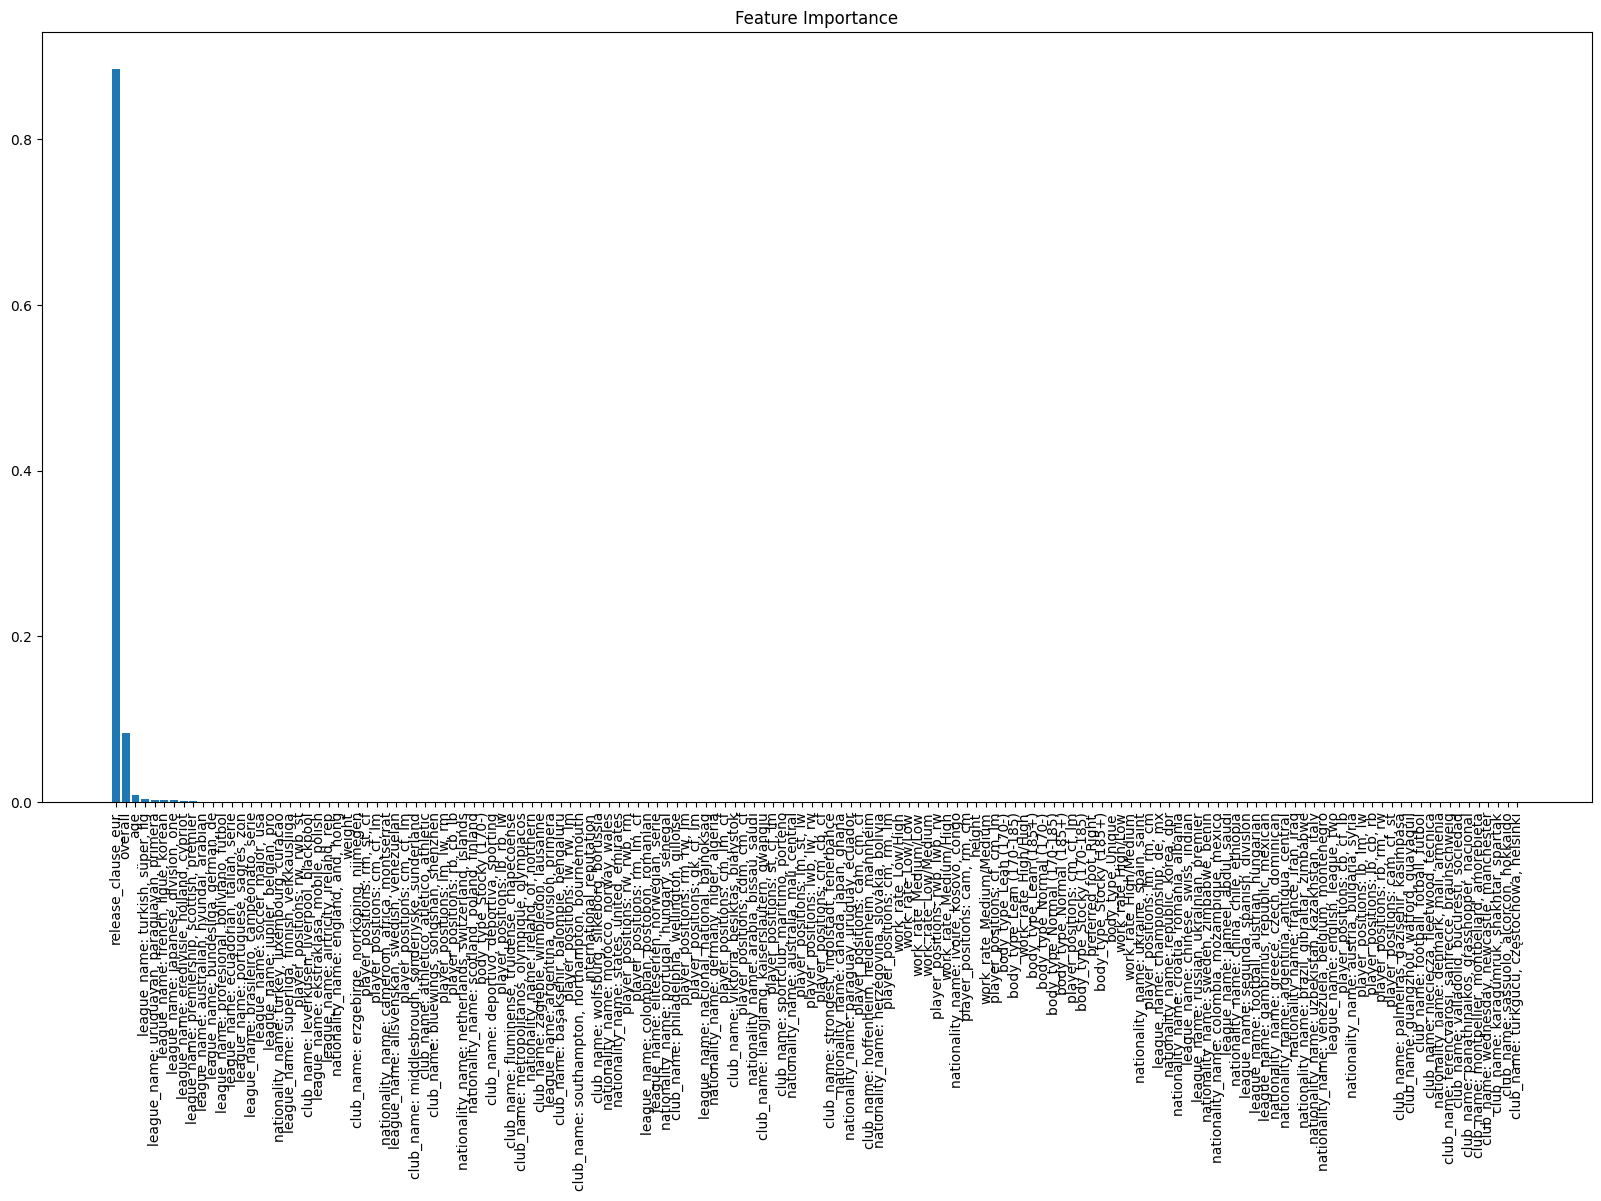

In [40]:
# find the most important features
import numpy as np
import matplotlib.pyplot as plt
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
features_names = np.array(tb.get_feature_names_out())
names = features_names[indices]
# Create plot
plt.figure(figsize=(20,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_rest_enc.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_rest_enc.shape[1]), names, rotation=90)
# Show plot
plt.show()


In [34]:
print(importances)

[8.33175963e-02 7.90101605e-03 0.00000000e+00 1.83928549e-04
 7.34895322e-05 8.85133579e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13251803e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.95628979e-05
 1.04239935e-04 1.44026438e-04 3.37557949e-05 2.51762765e-04
 1.04450199e-05 2.23999095e-05 0.00000000e+00 4.85872801e-05
 1.20102998e-04 0.00000000e+00 2.37363453e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.57271234e-06 4.95443003e-05 1.48638245e-04 8.22003966e-05
 2.66991414e-05 2.04164406e-05 0.00000000e+00 6.31636455e-05
 1.50051728e-04 1.21892343e-04 0.00000000e+00 6.59506763e-05
 7.18633090e-05 1.38621753e-04 8.27506708e-05 0.00000000e+00
 2.79779936e-05 0.00000000e+00 9.43061176e-05 1.22714535e-04
 1.61743523e-05 8.174443

#### COlleges

In [233]:
file_path = "../data/Colleges.txt"
try:
    df = pd.read_csv(file_path, sep="\t", encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, sep="\t", encoding='iso-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, sep="\t", encoding='cp1252')

In [234]:
df

Unnamed: 0    UNITID                                    School Name  \
0              0    100654                       Alabama A & M University   
1              1    100663            University of Alabama at Birmingham   
2              2    100690                             Amridge University   
3              3    100706            University of Alabama in Huntsville   
4              4    100724                       Alabama State University   
...          ...       ...                                            ...   
7799        7799  48285703       Georgia Military College-Columbus Campus   
7800        7800  48285704       Georgia Military College-Valdosta Campus   
7801        7801  48285705  Georgia Military College-Warner Robins Campus   
7802        7802  48285706                Georgia Military College-Online   
7803        7803  48285707        Georgia Military College-Stone Mountain   

                City State         ZIP                  School Webpage  \
0             Normal    AL       35762                   www.aamu.edu/   
1         Birmingham    AL  35294-0110                     www.uab.edu   
2         Montgomery    AL  36117-3553       www.amridgeuniversity.edu   
3         Huntsville    AL       35899                     www.uah.edu   
4         Montgomery    AL  36104-0271  www.alasu.edu/email/index.aspx   
...              ...   ...         ...                             ...   
7799        Columbus    GA       31909   http://columbus.gmc.cc.ga.us/   
7800        Valdosta    GA       31605   http://valdosta.gmc.cc.ga.us/   
7801   Warner Robins    GA       31093     http://robins.gmc.cc.ga.us/   
7802   Milledgeville    GA       31061     http://online.gmc.cc.ga.us/   
7803  Stone Mountain    GA       30083   http://fairburn.gmc.cc.ga.us/   

      Latitude  Longitude  Admission Rate  ...  \
0      34.7834   -86.5685          0.8989  ...   
1      33.5022   -86.8092          0.8673  ...   
2      32.3626   -86.1740             NaN  ...   
3      34.7228   -86.6384          0.8062  ...   
4      32.3643   -86.2957          0.5125  ...   
...        ...        ...             ...  ...   
7799       NaN        NaN             NaN  ...   
7800       NaN        NaN             NaN  ...   
7801       NaN        NaN             NaN  ...   
7802       NaN        NaN             NaN  ...   
7803       NaN        NaN             NaN  ...   

                                 Carnegie Undergraduate  \
0                        Full-time four-year, inclusive   
1     Medium full-time four-year, selective, higher ...   
2     Medium full-time four-year, inclusivestudents ...   
3     Medium full-time four-year, selective, higher ...   
4                        Full-time four-year, inclusive   
...                                                 ...   
7799                                                NaN   
7800                                                NaN   
7801                                                NaN   
7802                                                NaN   
7803                                                NaN   

                                          Carnegie Size  \
0     Medium 4-year, highly residential (3,000 to 9,...   
1     Large 4-year, primarily nonresidential (over 9...   
2     Very small 4-year, primarily nonresidential (l...   
3     Medium 4-year, primarily nonresidential (3,000...   
4     Medium 4-year, primarily residential (3,000 to...   
...                                                 ...   
7799                                                NaN   
7800                                                NaN   
7801                                                NaN   
7802                                                NaN   
7803                                                NaN   

      Religious Affiliation    Percent Female           agege24    faminc  \
0                       NaN  0.52999997138977  0.07999999821186  40211.22   
1                  

In [235]:
#rename School Name into name
df = df.rename(columns={"School Name": "name", "Median Earnings 6 years": "target"})

In [236]:
df.drop(columns=["Mean Earnings 6 years", "Median Earnings 10 years", "Mean Earnings 10 years"], inplace=True)

In [237]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [238]:
df["target"] = pd.to_numeric(df["target"], errors="coerce")
df.dropna(subset=["name", "target"], inplace=True)

In [239]:
df.to_parquet("../data/colleges.parquet")

## Met objects

In [76]:
!pwd

/scratch/lgrinszt/lm_tab/scripts


In [167]:
df = pd.read_csv("../data/MetObjects.csv")

/tmp/ipykernel_69989/1760004122.py:1: DtypeWarning: Columns (5,7,10,11,12,13,14,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MetObjects.csv")


In [168]:
df

Object Number  Is Highlight  Is Timeline Work  \
0                 1979.486.1         False             False   
1                 1980.264.5         False             False   
2                   67.265.9         False             False   
3                  67.265.10         False             False   
4                  67.265.11         False             False   
...                      ...           ...               ...   
474164  DP.Lichtenstein.2021         False             False   
474165    DP.Rosenquist.2021         False             False   
474166      DP.Nevinson.2021         False             False   
474167       DP.Picasso.2021         False             False   
474168          54.90.1188.1         False             False   

        Is Public Domain  Object ID Gallery Number           Department  \
0                  False          1            NaN    The American Wing   
1                  False          2            NaN    The American Wing   
2                  False          3            NaN    The American Wing   
3                  False          4            NaN    The American Wing   
4                  False          5            NaN    The American Wing   
...                  ...        ...            ...                  ...   
474164             False     849455            NaN  Drawings and Prints   
474165             False     849456            NaN  Drawings and Prints   
474166             False     849458            NaN  Drawings and Prints   
474167             False     849459            NaN  Drawings and Prints   
474168             False     849460            NaN  Drawings and Prints   

       AccessionYear Object Name                                  Title  ...  \
0             1979.0        Coin           One-dollar Liberty Head Coin  ...   
1             1980.0        Coin           Ten-dollar Liberty Head Coin  ...   
2             1967.0        Coin             Two-and-a-Half Dollar Coin  ...   
3             1967.0        Coin             Two-and-a-Half Dollar Coin  ...   
4             1967.0        Coin             Two-and-a-Half Dollar Coin  ...   
...              ...         ...                                    ...  ...   
474164           NaN       Print  Group of 2 prints by Roy Lichtenstein  ...   
474165           NaN       Print  Group of 2 prints by James Rosenquist  ...   
474166           NaN       Print   Group of 4 prints by C.R.W. Nevinson  ...   
474167           NaN         NaN     Group of 2 prints by Pablo Picasso  ...   
474168        1954.0       Print  Birds Eye View of New York & Environs  ...   

       River Classification Rights and Reproduction  \
0        NaN          Metal                     NaN   
1        NaN          Metal                     NaN   
2        NaN          Metal                     NaN   
3        NaN          Metal                     NaN   
4        NaN          Metal                     NaN   
...      ...            ...                     ...   
474164   NaN         Prints                     NaN   
474165   NaN         Prints                     NaN   
474166   NaN         Prints                     NaN   
474167   NaN         Prints                     NaN   
474168   NaN         Prints                     NaN   

                                            Link Resource Object Wikidata URL  \
0        http://www.metmuseum.org/art/collection/search/1                 NaN   
1        http://www.metmuseum.org/art/collection/search/2                 NaN   
2        http://www.metmuseum.org/art/collection/search/3                 NaN   
3        http://www.metmuseum.org/art/collection/search/4                 NaN   
4        http://www.metmuseum.org/art/collection/search/5                 NaN   
...                                                   ...                 ...   
474164  http://www.metmuseum.org/art/collection/search...                 NaN   
474165  http://www.metmuseum.org/art/collection/search...                 N

In [169]:
df.drop(columns=["Link Resource", "Object Wikidata URL", "Object ID", "Object Number", "Gallery Number", "Period"], inplace=True)

In [170]:
df = df.rename(columns={"Object Name": "name", "Department": "target"})

In [171]:
#numerical_columns = ["AccessionYear", 

In [172]:
df["AccessionYear"] = pd.to_numeric(df["AccessionYear"], errors='coerce')

In [173]:
df.columns

Index(['Is Highlight', 'Is Timeline Work', 'Is Public Domain', 'target',
       'AccessionYear', 'name', 'Title', 'Culture', 'Dynasty', 'Reign',
       'Portfolio', 'Constiuent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Metadata Date', 'Repository', 'Tags',
       'Tags AAT URL', 'Tags Wikidata URL'],
      dtype='object')

In [174]:
df

Is Highlight  Is Timeline Work  Is Public Domain               target  \
0              False             False             False    The American Wing   
1              False             False             False    The American Wing   
2              False             False             False    The American Wing   
3              False             False             False    The American Wing   
4              False             False             False    The American Wing   
...              ...               ...               ...                  ...   
474164         False             False             False  Drawings and Prints   
474165         False             False             False  Drawings and Prints   
474166         False             False             False  Drawings and Prints   
474167         False             False             False  Drawings and Prints   
474168         False             False             False  Drawings and Prints   

        AccessionYear   name                                  Title Culture  \
0              1979.0   Coin           One-dollar Liberty Head Coin     NaN   
1              1980.0   Coin           Ten-dollar Liberty Head Coin     NaN   
2              1967.0   Coin             Two-and-a-Half Dollar Coin     NaN   
3              1967.0   Coin             Two-and-a-Half Dollar Coin     NaN   
4              1967.0   Coin             Two-and-a-Half Dollar Coin     NaN   
...               ...    ...                                    ...     ...   
474164            NaN  Print  Group of 2 prints by Roy Lichtenstein     NaN   
474165            NaN  Print  Group of 2 prints by James Rosenquist     NaN   
474166            NaN  Print   Group of 4 prints by C.R.W. Nevinson     NaN   
474167            NaN    NaN     Group of 2 prints by Pablo Picasso     NaN   
474168         1954.0  Print  Birds Eye View of New York & Environs     NaN   

       Dynasty Reign  ... Locus Excavation River Classification  \
0          NaN   NaN  ...   NaN        NaN   NaN          Metal   
1          NaN   NaN  ...   NaN        NaN   NaN          Metal   
2          NaN   NaN  ...   NaN        NaN   NaN          Metal   
3          NaN   NaN  ...   NaN        NaN   NaN          Metal   
4          NaN   NaN  ...   NaN        NaN   NaN          Metal   
...        ...   ...  ...   ...        ...   ...            ...   
474164     NaN   NaN  ...   NaN        NaN   NaN         Prints   
474165     NaN   NaN  ...   NaN        NaN   NaN         Prints   
474166     NaN   NaN  ...   NaN        NaN   NaN         Prints   
474167     NaN   NaN  ...   NaN        NaN   NaN         Prints   
474168     NaN   NaN  ...   NaN        NaN   NaN         Prints   

       Rights and Reproduction Metadata Date  \
0                          NaN           NaN   
1                          NaN           NaN   
2                          NaN           NaN   
3                          NaN           NaN   
4                          NaN           NaN   
...                        ...           ...   
474164                     NaN           NaN   
474165                     NaN           NaN   
474166                     NaN           NaN   
474167                     NaN           NaN   
474168                     NaN           NaN   

                                      Repository Tags Tags AAT URL  \
0       Metropolitan Museum of Art, New York, NY  NaN          NaN   
1       Metropolitan Museum of Art, New York, NY  NaN          NaN   
2       Metropolitan Museum of Art, New York, NY  NaN          NaN   
3       Metropolitan Museum of Art, New York, NY  NaN          NaN   
4       Metropolitan Museum of Art, New York, NY  NaN          NaN   
...                                          ...  ...          ...   
474164  Metropolitan Museum of Art, New York, NY  NaN          NaN   
474165  Metropolitan Museum of Art, New York, NY  NaN          NaN   
474166  Metropolitan Museum of Art, New York, NY  NaN          NaN   
4741

In [175]:
df.to_parquet("../data/met_objects.parquet")

## kickstarter

In [116]:
df = pd.read_csv("../data/ks-projects-201612.csv", encoding='latin1')

/tmp/ipykernel_69989/3257166536.py:1: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/ks-projects-201612.csv", encoding='latin1')


In [120]:
# strip column names
df.columns = df.columns.str.strip()

In [122]:
df = df[df["state"].isin(["successful", "failed"])]
df.rename(columns={"name": "name", "state": "target"}, inplace=True)
df.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], inplace=True)

/tmp/ipykernel_69989/1319881136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"name": "name", "state": "target"}, inplace=True)
/tmp/ipykernel_69989/1319881136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], inplace=True)


In [124]:
df.to_parquet("../data/kickstarter.parquet")

## public procurement

In [262]:
df = pd.read_csv("../data/Export_OpenDataCAN_year2011.csv")

/tmp/ipykernel_69989/3167485484.py:1: DtypeWarning: Columns (10,20,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Export_OpenDataCAN_year2011.csv")


In [263]:
df.columns

Index(['ID_NOTICE_CAN', 'TED_NOTICE_URL', 'YEAR', 'ID_TYPE', 'DT_DISPATCH',
       'XSD_VERSION', 'CANCELLED', 'CORRECTIONS', 'B_MULTIPLE_CAE', 'CAE_NAME',
       'CAE_NATIONALID', 'CAE_ADDRESS', 'CAE_TOWN', 'CAE_POSTAL_CODE',
       'CAE_GPA_ANNEX', 'ISO_COUNTRY_CODE', 'ISO_COUNTRY_CODE_GPA',
       'B_MULTIPLE_COUNTRY', 'ISO_COUNTRY_CODE_ALL', 'CAE_TYPE',
       'EU_INST_CODE', 'MAIN_ACTIVITY', 'B_ON_BEHALF',
       'B_INVOLVES_JOINT_PROCUREMENT', 'B_AWARDED_BY_CENTRAL_BODY',
       'TYPE_OF_CONTRACT', 'TAL_LOCATION_NUTS', 'B_FRA_AGREEMENT',
       'FRA_ESTIMATED', 'B_FRA_CONTRACT', 'B_DYN_PURCH_SYST', 'CPV',
       'MAIN_CPV_CODE_GPA', 'ID_LOT', 'ADDITIONAL_CPVS', 'B_GPA',
       'GPA_COVERAGE', 'LOTS_NUMBER', 'VALUE_EURO', 'VALUE_EURO_FIN_1',
       'VALUE_EURO_FIN_2', 'B_EU_FUNDS', 'TOP_TYPE', 'B_ACCELERATED',
       'OUT_OF_DIRECTIVES', 'CRIT_CODE', 'CRIT_PRICE_WEIGHT', 'CRIT_CRITERIA',
       'CRIT_WEIGHTS', 'B_ELECTRONIC_AUCTION', 'NUMBER_AWARDS', 'ID_AWARD',
       'ID_LOT_AWA

In [264]:
df.drop(columns=["TED_NOTICE_URL", "ID_NOTICE_CAN", "AWARD_EST_VALUE_EURO", "AWARD_VALUE_EURO_FIN_1", "ID_LOT_AWARDED"], inplace=True)
df.rename(columns={"CAE_NAME": "name", "AWARD_VALUE_EURO": "target"}, inplace=True)

In [265]:
df.dropna(subset=["name", "target"], inplace=True)

In [266]:
df = df[df.columns[pd.isnull(df).sum(axis=0) < 30_000]]

# remove almost constant columns
columns_to_remove = []
for col in df.columns:
    _, counts = np.unique(df[col].astype(str), return_counts=True)
    if counts[0] / len(df) > 0.97:
        columns_to_remove.append(col)
df.drop(columns=columns_to_remove, inplace=True)

In [267]:
df

ID_TYPE DT_DISPATCH XSD_VERSION  \
1             3   29-DEC-10     R207.S3   
2             3   29-DEC-10     R207.S3   
3             3   29-DEC-10     R207.S3   
4             3   30-DEC-10     R207.S3   
5             3   30-DEC-10     R207.S3   
...         ...         ...         ...   
485612        6   22-DEC-11     R208.S2   
485613        6   22-DEC-11     R208.S2   
485614        6   22-DEC-11     R208.S2   
485615        6   22-DEC-11     R208.S2   
485617        3   29-DEC-11     R208.S2   

                                                     name  \
1             Západoslovenská vodárenská spoločnosť; a.s.   
2                Der Kreisausschuss des Hochtaunuskreises   
3                Der Kreisausschuss des Hochtaunuskreises   
4       Hoogheemraadschap van Schieland en de Krimpene...   
5                          Staatliches Bauamt Schweinfurt   
...                                                   ...   
485612  Jastrzębska Spółka Węglowa S.A. Zakład Logisty...   
485613  Jastrzębska Spółka Węglowa S.A. Zakład Logisty...   
485614  Jastrzębska Spółka Węglowa S.A. Zakład Logisty...   
485615  Jastrzębska Spółka Węglowa S.A. Zakład Logisty...   
485617                             Universitetet i Bergen   

                         CAE_ADDRESS                  CAE_TOWN  \
1       Nábrežie za hydrocentrálou 4                     Nitra   
2           Ludwig-Erhard-Anlage 1-5  Bad Homburg vor der Höhe   
3           Ludwig-Erhard-Anlage 1-5  Bad Homburg vor der Höhe   
4                       Postbus 4059                 Rotterdam   
5               Mainberger Straße 14               Schweinfurt   
...                              ...                       ...   
485612                ul. Towarowa 1          Jastrzębie-Zdrój   
485613                ul. Towarowa 1          Jastrzębie-Zdrój   
485614                ul. Towarowa 1          Jastrzębie-Zdrój   
485615                ul. Towarowa 1          Jastrzębie-Zdrój   
485617                       Pb 7800                    Bergen   

       CAE_POSTAL_CODE ISO_COUNTRY_CODE CAE_TYPE TYPE_OF_CONTRACT  ...  \
1               949 60               SK        8                W  ...   
2                61352               DE        3                W  ...   
3                61352               DE        3                W  ...   
4              3006 AB               NL        3                W  ...   
5                97422               DE        3                W  ...   
...                ...              ...      ...              ...  ...   
485612          44-330               PL        4                U  ...   
485613          44-330               PL        4                U  ...   
485614          44-330               PL        4                U  ...   
485615          44-330               PL        4                U  ...   
485617            5020               NO        8                U  ...   

       VALUE_EURO_FIN_2 TOP_TYPE  CRIT_CODE  NUMBER_AWARDS   ID_AWARD  \
1           19979964.00      RES          L              1  4317385.0   
2             166306.75      OPE          M              1  4317386.0   
3             394932.02      OPE          M              1  4317387.0   
4           32688000.00      RES          M              1  4317388.0   
5              84069.15      OPE          M              1  4317389.0   
...                 ...      ...        ...            ...        ...   
485612       3469310.85      OPE          L             13  4920307.0   
485613       3469310.85      OPE          L             13  4920308.0   
485614       3469310.85      OPE          L             13  4920309.0   
485615       3469310.85      OPE          L             13  4920310.0   
485617        555598.33      OPE          M              1  4920312.0   

                                                 WIN_NAME    WIN_TOWN  \
1                           ZIPP Bratislava; spol. s r.o.  Bratislava   
2                                        Joh. Meiner 

In [268]:
df.to_parquet("../data/public.parquet")

## Drug directory

In [141]:
from skrub.datasets import fetch_drug_directory

In [144]:
df = fetch_drug_directory().X

In [145]:
# add y
df["target"] = fetch_drug_directory().y

In [147]:
#df.drop(columns=["ROW_ID", "PRODUCTID", "PRODUCTNDC", ], inplace=True)@

## Agora

In [218]:
df = pd.read_csv("../data/Agora.csv", encoding='latin1')

In [219]:
df.columns = df.columns.str.strip()

In [220]:
# Remove "BTC" from 'Price' and convert to numeric
df['Price'] = df['Price'].str.replace('BTC', '').apply(pd.to_numeric, errors='coerce')

# Split the 'Rating' into two separate numbers
df[['Rating_num', 'Rating_den']] = df['Rating'].str.split('/', expand=True)

# Convert these new columns to numeric
df[['Rating_num', 'Rating_den']] = df[['Rating_num', 'Rating_den']].apply(pd.to_numeric, errors='coerce')

# Create a new column for the decimal representation of the rating
df['target'] = df['Rating_num']
df["name"] = df["Item"]

# Now you can drop the original 'Rating' column and the split columns if you want
df = df.drop(columns=['Rating', 'Rating_num', 'Rating_den', "Item Description"])

In [221]:
df

Vendor             Category  \
0         CheapPayTV     Services/Hacking   
1         CheapPayTV     Services/Hacking   
2          KryptykOG     Services/Hacking   
3           cyberzen     Services/Hacking   
4       businessdude     Services/Hacking   
...              ...                  ...   
109684       gonz324  Drugs/Opioids/Opium   
109685     cheqdropz    Weapons/Fireworks   
109686     SnowQueen  Drugs/Opioids/Opium   
109687     SnowQueen  Drugs/Opioids/Opium   
109688    daydreamer  Drugs/Opioids/Opium   

                                                     Item     Price   Origin  \
0                             12 Month HuluPlus gift Code  0.050270  Torland   
1       Pay TV Sky UK  Sky Germany HD TV  and much mor...  0.152420  Torland   
2                    OFFICIAL Account Creator Extreme 4.2  0.007000  Torland   
3                               VPN > TOR > SOCK TUTORIAL  0.019017      NaN   
4                                  Facebook hacking guide  0.062018  Torland   
...                                                   ...       ...      ...   
109684                                1 gr purified Opium  0.143637  Germany   
109685                                    Shipping Ticket  0.086806      USA   
109686  0.50 GRAMS #4  White Afghani Heroin - FULL ESCROW  0.336412   Canada   
109687    1.0 GRAMS #4 White Afghani Heroin - FULL ESCROW  0.611658   Canada   
109688                    HEROIN STAMP BAG (10pcs) BUNDLE  0.254911      USA   

       Destination Remarks  target  \
0              NaN     NaN    4.96   
1              NaN     NaN    4.96   
2              NaN     NaN    4.93   
3              NaN     NaN    4.89   
4              NaN     NaN    4.88   
...            ...     ...     ...   
109684         NaN     NaN    4.91   
109685         NaN     NaN     NaN   
109686   Worldwide     NaN     NaN   
109687   Worldwide     NaN     NaN   
109688         NaN     NaN    4.87   

                                                     name  
0                             12 Month HuluPlus gift Code  
1       Pay TV Sky UK  Sky Germany HD TV  and much mor...  
2                    OFFICIAL Account Creator Extreme 4.2  
3                               VPN > TOR > SOCK TUTORIAL  
4                                  Facebook hacking guide  
...                                                   ...  
109684                                1 gr purified Opium  
109685                                    Shipping Ticket  
109686  0.50 GRAMS #4  White Afghani Heroin - FULL ESCROW  
109687    1.0 GRAMS #4 White Afghani Heroin - FULL ESCROW  
109688                    HEROIN STAMP BAG (10pcs) BUNDLE  

[109689 rows x 9 columns]

In [222]:
df.to_parquet("../data/agora.parquet")

## Building permit

In [212]:
df = pd.read_csv("../data/data/building-permits.csv")

/tmp/ipykernel_69989/3299529572.py:1: DtypeWarning: Columns (1,49,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/data/building-permits.csv")


In [213]:
df.columns = df.columns.str.strip()

In [214]:
cols_to_drop = ["ID", "LOCATION",'BUILDING_FEE_PAID',
 'ZONING_FEE_PAID',
 'OTHER_FEE_PAID',
 'SUBTOTAL_PAID',
 'BUILDING_FEE_UNPAID',
 'ZONING_FEE_UNPAID',
 'OTHER_FEE_UNPAID',
 'SUBTOTAL_UNPAID',
 'BUILDING_FEE_WAIVED',
 'ZONING_FEE_WAIVED',
 'OTHER_FEE_WAIVED',
 'SUBTOTAL_WAIVED',
 "PERMIT#"
]
for col in df.columns:
    if "Unnamed" in col:
        cols_to_drop.append(col)
    if col.startswith("CONTACT") or col.startswith("PIN"):
        cols_to_drop.append(col)
df.drop(columns=cols_to_drop, inplace=True)

In [215]:
df.rename(columns={"WORK_DESCRIPTION": "name", "TOTAL_FEE": "target"}, inplace=True)

In [216]:
df.to_parquet("../data/building_permits.parquet")

In [217]:
pd.read_parquet("../data/agora.parquet")

Vendor             Category  \
0         CheapPayTV     Services/Hacking   
1         CheapPayTV     Services/Hacking   
2          KryptykOG     Services/Hacking   
3           cyberzen     Services/Hacking   
4       businessdude     Services/Hacking   
...              ...                  ...   
109684       gonz324  Drugs/Opioids/Opium   
109685     cheqdropz    Weapons/Fireworks   
109686     SnowQueen  Drugs/Opioids/Opium   
109687     SnowQueen  Drugs/Opioids/Opium   
109688    daydreamer  Drugs/Opioids/Opium   

                                                     Item     Price   Origin  \
0                             12 Month HuluPlus gift Code  0.050270  Torland   
1       Pay TV Sky UK  Sky Germany HD TV  and much mor...  0.152420  Torland   
2                    OFFICIAL Account Creator Extreme 4.2  0.007000  Torland   
3                               VPN > TOR > SOCK TUTORIAL  0.019017     None   
4                                  Facebook hacking guide  0.062018  Torland   
...                                                   ...       ...      ...   
109684                                1 gr purified Opium  0.143637  Germany   
109685                                    Shipping Ticket  0.086806      USA   
109686  0.50 GRAMS #4  White Afghani Heroin - FULL ESCROW  0.336412   Canada   
109687    1.0 GRAMS #4 White Afghani Heroin - FULL ESCROW  0.611658   Canada   
109688                    HEROIN STAMP BAG (10pcs) BUNDLE  0.254911      USA   

       Destination Remarks  target  
0             None    None    4.96  
1             None    None    4.96  
2             None    None    4.93  
3             None    None    4.89  
4             None    None    4.88  
...            ...     ...     ...  
109684        None    None    4.91  
109685        None    None     NaN  
109686   Worldwide    None     NaN  
109687   Worldwide    None     NaN  
109688        None    None    4.87  

[109689 rows x 8 columns]